In [1]:
from data_cleaning import get_data_cleaned
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glassdoor_df, h1bdata_df, salary_ai_df = get_data_cleaned()

# Taking a look at dataset types

In [3]:
glassdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Location            742 non-null    object 
 5   Headquarters        742 non-null    object 
 6   Size                742 non-null    object 
 7   Founded             742 non-null    int64  
 8   Type of ownership   742 non-null    object 
 9   Sector              742 non-null    object 
 10  Revenue             742 non-null    object 
 11  Lower Salary        742 non-null    int64  
 12  Upper Salary        742 non-null    int64  
 13  Avg Salary(K)       742 non-null    float64
 14  company_txt         742 non-null    object 
 15  Job Location        742 non-null    object 
 16  Age     

In [4]:
glassdoor_df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [5]:
glassdoor_df['job_title_sim'] = glassdoor_df['job_title_sim'].apply(lambda x: 'others' if x=='na'  else x)

In [6]:
glassdoor_df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
others                             10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [7]:
glassdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Location            742 non-null    object 
 5   Headquarters        742 non-null    object 
 6   Size                742 non-null    object 
 7   Founded             742 non-null    int64  
 8   Type of ownership   742 non-null    object 
 9   Sector              742 non-null    object 
 10  Revenue             742 non-null    object 
 11  Lower Salary        742 non-null    int64  
 12  Upper Salary        742 non-null    int64  
 13  Avg Salary(K)       742 non-null    float64
 14  company_txt         742 non-null    object 
 15  Job Location        742 non-null    object 
 16  Age     

In [8]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 4660
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4587 non-null   int64 
 1   company     4587 non-null   object
 2   title       4587 non-null   object
 3   salary      4587 non-null   object
 4   location    4587 non-null   object
 5   date        4587 non-null   object
dtypes: int64(1), object(5)
memory usage: 250.9+ KB


In [9]:
salary_ai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    int64 
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(4), object(7)
memory usage: 21.2+ KB


In [10]:
glassdoor_df['Location'].apply(lambda x: x.split(',')[1].strip())

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
737    MA
738    TN
739    PA
740    PA
741    OH
Name: Location, Length: 742, dtype: object

In [11]:
glassdoor_df[glassdoor_df["Location"].apply(lambda x: str(x).split(',')[1].strip()) != glassdoor_df['Location'].apply(lambda x: x.split(',')[1].strip())]['Location'] =  'Santa Fe Springs, CA'

In [12]:
glassdoor_df['Location'].loc[126] =  [ 'Santa Fe Springs, CA']
glassdoor_df['Location'].loc[126]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


['Santa Fe Springs, CA']

## Separating columns from states in differente columns

In [144]:
glassdoor_df["Job City"] =  glassdoor_df["Location"].apply(lambda x: str(x).upper().split(',')[0].strip())
glassdoor_df["Job State"] =  glassdoor_df["Location"].apply(lambda x: str(x).upper().split(',')[1].strip())
h1bdata_df['Job City'] = h1bdata_df["location"].apply(lambda x: str(x).upper().split(',')[0].strip())
h1bdata_df['Job State'] = h1bdata_df["location"].apply(lambda x: str(x).upper().split(',')[1].strip())


## Transform anual salary in month salary

In [14]:
glassdoor_df['Avg Month Salary(K)']=glassdoor_df['Avg Salary(K)'].apply(lambda x: round(x/13,2))
h1bdata_df['Month Salary']=h1bdata_df['salary'].apply(lambda x: round(float(x.split(',')[0])*1000/13,2))
salary_ai_df['Month Salary'] = salary_ai_df['salary_in_usd'].apply(lambda x: round(float(x)/13,2))

## Putting data type in right mood

In [15]:
h1bdata_df['salary'] = h1bdata_df['salary'].apply(lambda x: np.int64(x.replace(',','')))

## transform date in strings to date

In [16]:
from datetime import datetime
h1bdata_df['date'] = pd.to_datetime( h1bdata_df['date'])
h1bdata_df['year'] = [i.year for i in h1bdata_df['date']]

## sorting h1bdata_df by company and year

In [17]:
h1bdata_df.sort_values(by=['year','company'], inplace=True, ascending=True)
h1bdata_df.head(10)

Unnamed: 0                                     company           title  \
3155        3155                                  AIRBNB INC  DATA SCIENTIST   
391          391                                APPNEXUS INC  DATA SCIENTIST   
459          459  AXIAL NETWORKS INC (FORMERLY AXIAL MARKET)  DATA SCIENTIST   
1901        1901                                     C1X INC  DATA SCIENTIST   
828          828                              CANVAS FRG LLC  DATA SCIENTIST   
758          758                                FACEBOOK INC  DATA SCIENTIST   
3619        3619                                FACEBOOK INC  DATA SCIENTIST   
103          103                         FINO CONSULTING LLC  DATA SCIENTIST   
350          350                                 GROUPON INC  DATA SCIENTIST   
935          935                            INTENT MEDIA INC  DATA SCIENTIST   

      salary           location       date       Job City  Month Salary  year  
3155  160000  SAN FRANCISCO, CA 2014-09-26  SAN FRANCISCO      12307.69  2014  
391   110000       NEW YORK, NY 2014-10-24       NEW YORK       8461.54  2014  
459   115000       NEW YORK, NY 2014-12-15       NEW YORK       8846.15  2014  
1901  110000       SAN JOSE, CA 2014-10-23       SAN JOSE       8461.54  2014  
828   150000       NEW YORK, NY 2014-10-31       NEW YORK      11538.46  2014  
758   140000       NEW YORK, NY 2014-11-07       NEW YORK      10769.23  2014  
3619  112000        SEATTLE, WA 2014-12-17        SEATTLE       8615.38  2014  
103    82000       NEW YORK, NY 2014-10-16       NEW YORK       6307.69  2014  
350   105000       NEW YORK, NY 2014-10-21       NEW YORK       8076.92  2014  
935   163000       NEW YORK, NY 2014-10-07       NEW YORK      12538.46  2014

In [18]:
h1bdata_df['Job City']

3155    SAN FRANCISCO
391          NEW YORK
459          NEW YORK
1901         SAN JOSE
828          NEW YORK
            ...      
88           NEW YORK
3597          SEATTLE
4312        MILWAUKEE
620          NEW YORK
1825         SAN JOSE
Name: Job City, Length: 4587, dtype: object

## Let's define explicity columns for companies sizes

In [19]:
def remake_company_size_company(x):
    mapper = {
        'L': 'LARGER',
        'M': 'MEDIUM',
        'S': 'SMALL'
    }
    return mapper[x]

def define_company_size(x,y):
    revenue = x.lower()
    headcount = y.lower()
    mapper = {
        '$10+ billion (usd)': 'LARGE',
        '$5 to $10 billion (usd)': 'LARGE',
        '$1 to $2 billion (usd)': 'LARGE',
        '$2 to $5 billion (usd)': 'LARGE',
        '$500 million to $1 billion (usd)': 'LARGE',
        '$100 to $500 million (usd)': 'MEDIUM',
        '$50 to $100 million (usd)':  'MEDIUM',
        '$25 to $50 million (usd)': 'MEDIUM',
        '$10 to $25 million (usd)': 'SMALL',
        '$5 to $10 million (usd)': 'SMALL',
        '$1 to $5 million (usd)': 'SMALL',
        'less than $1 million (usd)': 'MICRO'
    }
    classification = 'na' if  ('unknow' in revenue or 'unknow' in headcount) else mapper[revenue]
    return classification
    
    

In [20]:
salary_ai_df['Company Size'] = salary_ai_df['company_size'].apply(remake_company_size_company)


In [424]:
h1bdata_df['year'] =  h1bdata_df['date'].apply(lambda x: x.year)
h1bdata_df = h1bdata_df[h1bdata_df['year'] == 2021]

In [384]:
glassdoor_df['Company Size'] = glassdoor_df[['Revenue','Size']].apply(lambda x: define_company_size(x["Revenue"],x["Size"]), axis =1)

In [385]:
glassdoor_df

Job Title  \
0                                       Data Scientist   
1                            Healthcare Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
..                                                 ...   
737           Sr Scientist, Immuno-Oncology - Oncology   
738                               Senior Data Engineer   
739  Project Scientist - Auton Lab, Robotics Institute   
740                               Data Science Manager   
741          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
4    $86K-$143K (Glassdoor est.)   
..                           ...   
737  $58K-$111K (Glassdoor est.)   
738  $72K-$133K (Glassdoor est.)   
739   $56K-$91K (Glassdoor est.)   
740  $95K-$160K (Glassdoor est.)   
741  $61K-$126K (Glassdoor est.)   

                                       Job Description  Rating  \
0    Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1    What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2    KnowBe4, Inc. is a high growth information sec...     4.8   
3    *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
737  Site Name: USA - Massachusetts - Cambridge\nPo...     3.9   
738  THE CHALLENGE\nEventbrite has a world-class da...     4.4   
739  The Auton Lab at Carnegie Mellon University is...     2.6   
740  Data Science ManagerResponsibilities:\n\nOvers...     3.2   
741  Returning Candidate? Log back in to the Career...     3.6   

            Location               Headquarters          Size  Founded  \
0    Albuquerque, NM                 Goleta, CA   501 - 1000      1973   
1      Linthicum, MD              Baltimore, MD       10000+      1984   
2     Clearwater, FL             Clearwater, FL   501 - 1000      2010   
3       Richland, WA               Richland, WA  1001 - 5000      1965   
4       New York, NY               New York, NY     51 - 200      1998   
..               ...                        ...           ...      ...   
737    Cambridge, MA  Brentford, United Kingdom       10000+      1830   
738    Nashville, TN          San Francisco, CA  1001 - 5000      2006   
739   Pittsburgh, PA             Pittsburgh, PA   501 - 1000      1984   
740    Allentown, PA            Chadds Ford, PA       1 - 50        -1   
741  Beavercreek, OH              Arlington, VA   501 - 1000      1967   

          Type of ownership                        Sector  ... mongo  \
0         Company - Private           Aerospace & Defense  ...     0   
1        Other Organization                   Health Care  ...     0   
2         Company - Private             Business Services  ...     0   
3                Government  Oil, Gas, Energy & Utilities  ...     0   
4         Company - Private             Business Services  ...     0   
..                      ...                           ...  ...   ...   
737        Company - Public     Biotech & Pharmaceuticals  ...     0   
738        Company - Public        Information Technology  ...     0   
739    College / University                     Education  ...     0   
740       Company - Private             Business Services  ...     0   
741  Nonprofit Organization                    Government  ...     0   

     google_an    job_title_sim  seniority_by_title Degree     Job City  \
0            0   data scientist                  na      M  ALBUQUERQUE   
1            0   data scientist                  na      M    LINTHICUM   
2            0   data scientist                  na      M   CLEARWATER   
3            0   data scientist                  na     na     RICHL

## Classify as american and non american companies

In [386]:
def classify_companies_origen(x):
    USA_STATES = ['AL','AK','AZ','AR','CA','CZ','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VT','VI','VA','WA','WV','WI','WY']
    if x=='-1':
        return 'na'
    location = x.split(', ')[1].strip()
    
    
    return 'USA' if location in  USA_STATES else location

<Figure size 2160x2160 with 0 Axes>

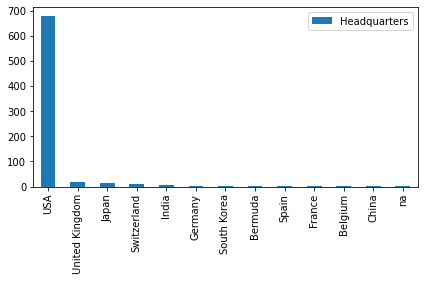

In [387]:
plt.figure(figsize=(30,30))
pd.DataFrame(glassdoor_df['Headquarters'].apply(classify_companies_origen).value_counts()).plot.bar()
plt.tight_layout()

I have to make a little comment here, the glassdoor dataset only serve to analyse sallaries in USA, in global terms it's not representative.

# Data analysis

### How is it distributed range salaries per data science job role in 2021 at USA?  what about the average monthly salaries?

In [388]:
glassdoor_df['Frequency'] = 1
salary_range_groups = glassdoor_df[['job_title_sim', 'Avg Salary(K)','Frequency']].groupby(['job_title_sim','Avg Salary(K)']).sum()
job_roles = glassdoor_df['job_title_sim'].unique()

salary_range_groups.loc['Data scientist project manager']['Frequency']



Avg Salary(K)
40.5     1
61.5     3
63.0     2
64.0     4
74.0     1
87.5     2
96.5     1
109.5    2
Name: Frequency, dtype: int64

In [389]:
def groupby_range(df,column,count_column,range_length):
    
    values= df[column]
   # min_value = values.min()
    max_value = values.max()
    print(max_value)
    offset = 10*range_length
    ranges= pd.cut(values.values, np.arange(0, max_value + offset,range_length))
    
    tmp_df = pd.DataFrame(values)
    tmp_df['ranges'] = ranges
    
    tmp_df[count_column] = 1
   
    
    tmp_df = tmp_df[['ranges',count_column]].groupby('ranges').sum().reset_index()
   
    

    # getting rid of range that never occurs
    tmp_df = tmp_df[tmp_df[count_column] > 0]
    
    
    # set range values as index
    tmp_df = tmp_df.set_index('ranges')
    tmp_df.dropna(inplace=True)
    return  tmp_df

In [390]:
 groupby_range(salaries_ds_2021_df.loc['data scientist'].reset_index(),'salary','frequency',10000)


30400000


frequency
ranges                         
(0, 10000]                    2
(10000, 20000]                2
(20000, 30000]                1
(30000, 40000]                5
(40000, 50000]                7
(50000, 60000]               40
(60000, 70000]               70
(70000, 80000]              113
(80000, 90000]              130
(90000, 100000]             158
(100000, 110000]            128
(110000, 120000]            154
(120000, 130000]            124
(130000, 140000]             83
(140000, 150000]             95
(150000, 160000]             68
(160000, 170000]             57
(170000, 180000]             35
(180000, 190000]             37
(190000, 200000]             15
(200000, 210000]              5
(210000, 220000]              5
(220000, 230000]              4
(230000, 240000]              5
(240000, 250000]              1
(250000, 260000]              2
(290000, 300000]              1
(410000, 420000]              2
(1240000, 1250000]            1
(1350000, 1360000]            1
(2090000, 2100000]            1
(2190000, 2200000]            1
(2490000, 2500000]            1
(3990000, 4000000]            1
(6990000, 7000000]            1
(30390000, 30400000]          1

In [391]:
def plot_salaryFreqDistJobRoles(salary_groups,job_roles):
   
    for i,job_role in zip([k for k in range(1,len(job_roles))], job_roles):
        
        plt.figure()
        if( len(salary_groups.loc[job_role].values) > 20):
            
            tmp_df = groupby_range(salary_groups.loc[job_role].reset_index(),"Avg Salary(K)",'Frequency',10)
            ax = tmp_df['Frequency'].plot(figsize=(150,50), kind='bar')
            plt.xlabel(" Range Avg Salaries ", fontsize=50)
        else:
            ax = salary_groups.loc[job_role].plot(figsize=(80,50), kind='bar')
            plt.xlabel(" Avg Salaries", fontsize=50)
        
        plt.ylabel('Frequency',fontsize=50)
        plt.title('Frequency distribution of ' + job_role + ' Salary',fontsize=100 )
        plt.grid(True, color='black')
        ax.tick_params(axis='both', which='major', labelsize=100)
        

254.0
174.0
173.0
205.0


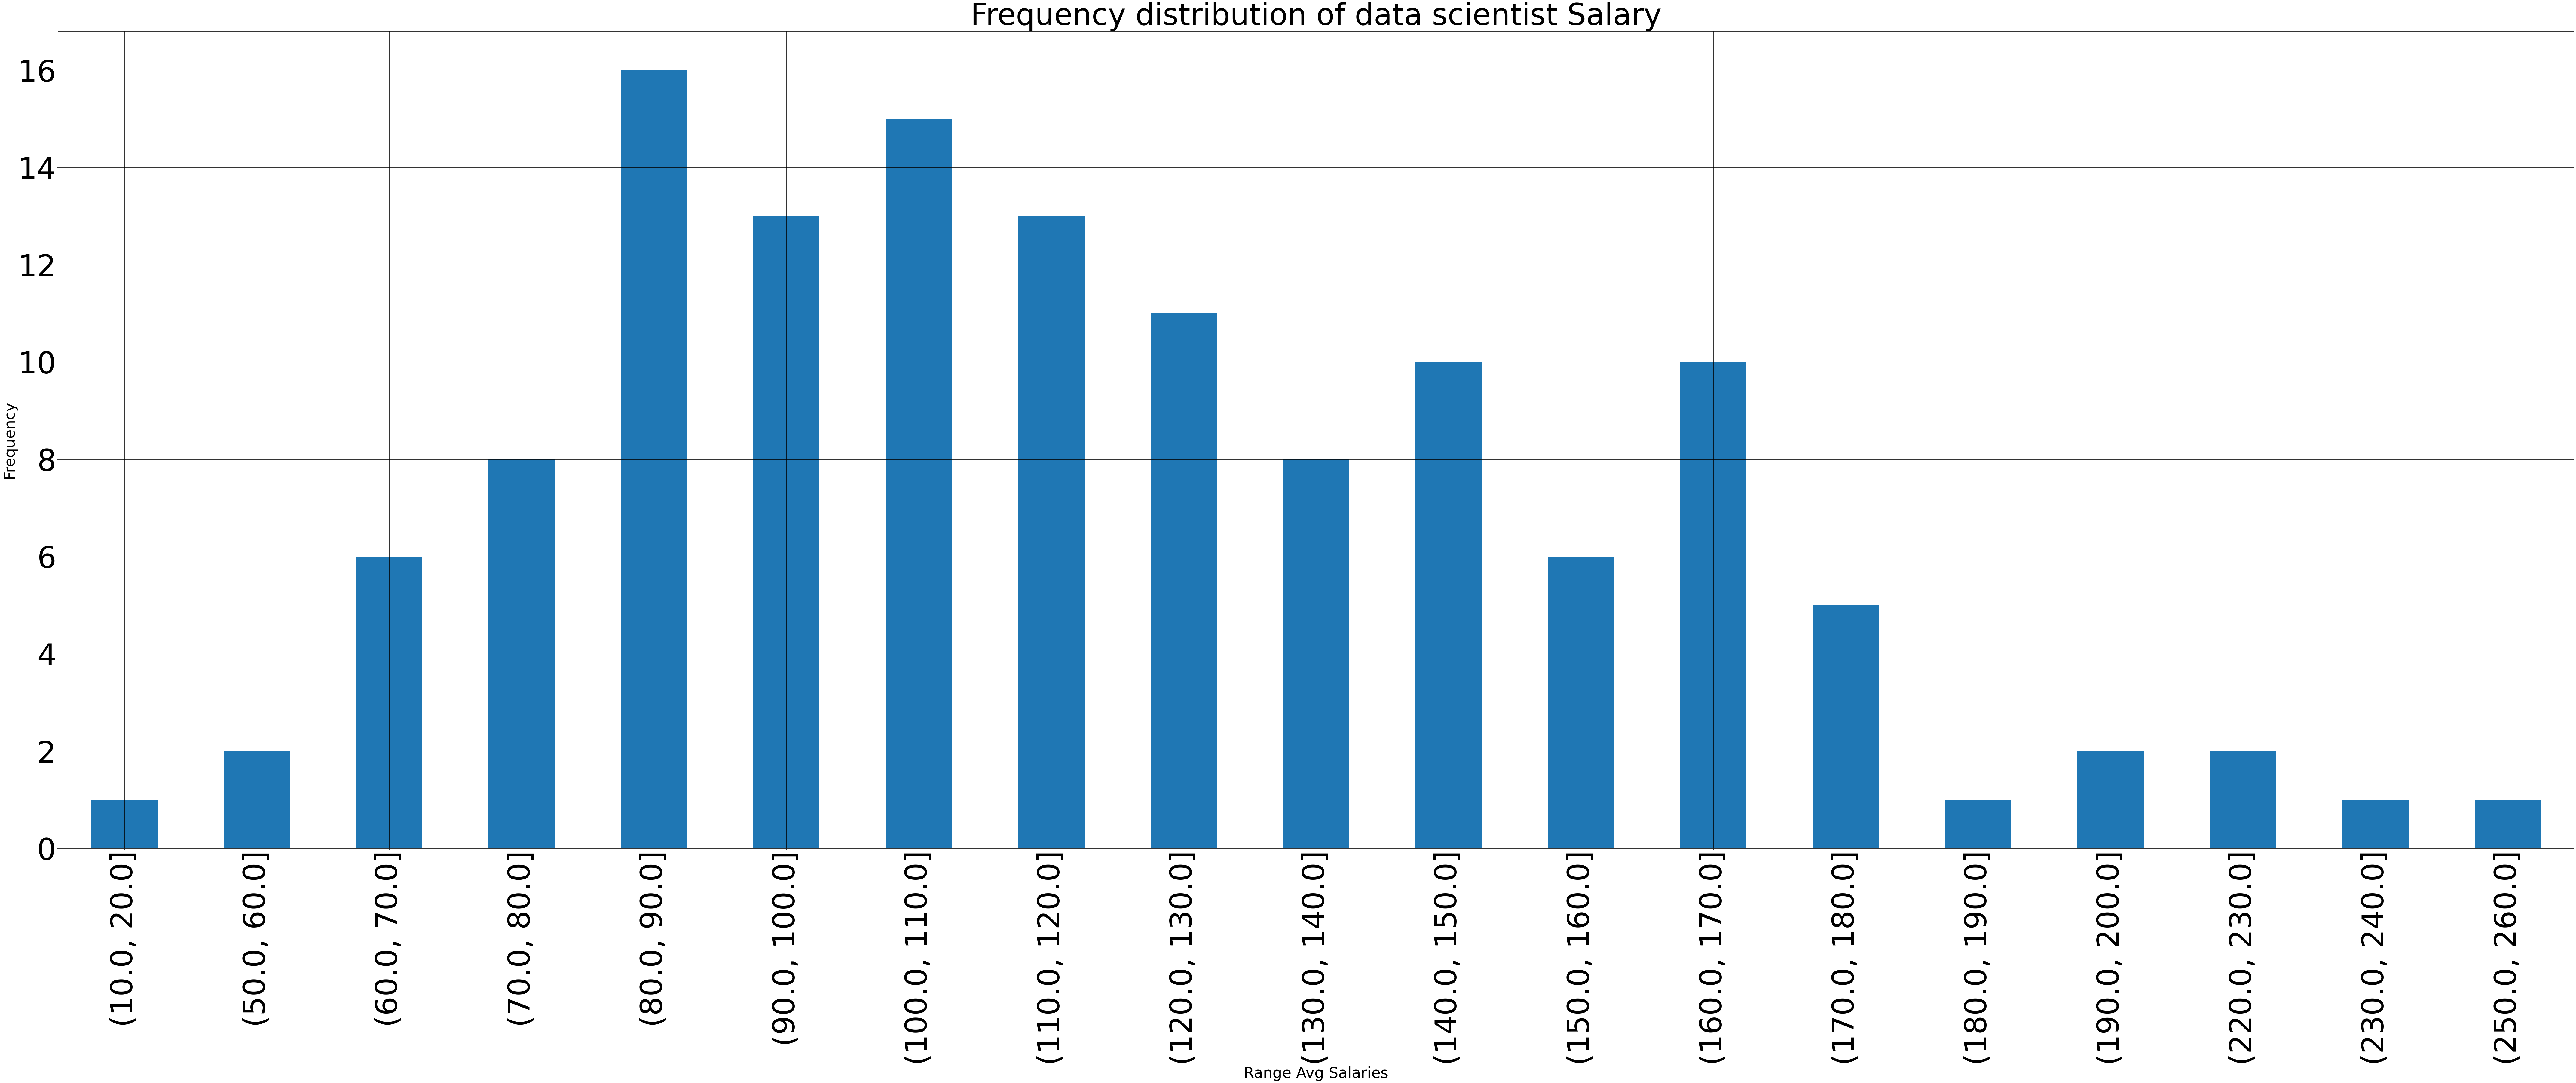

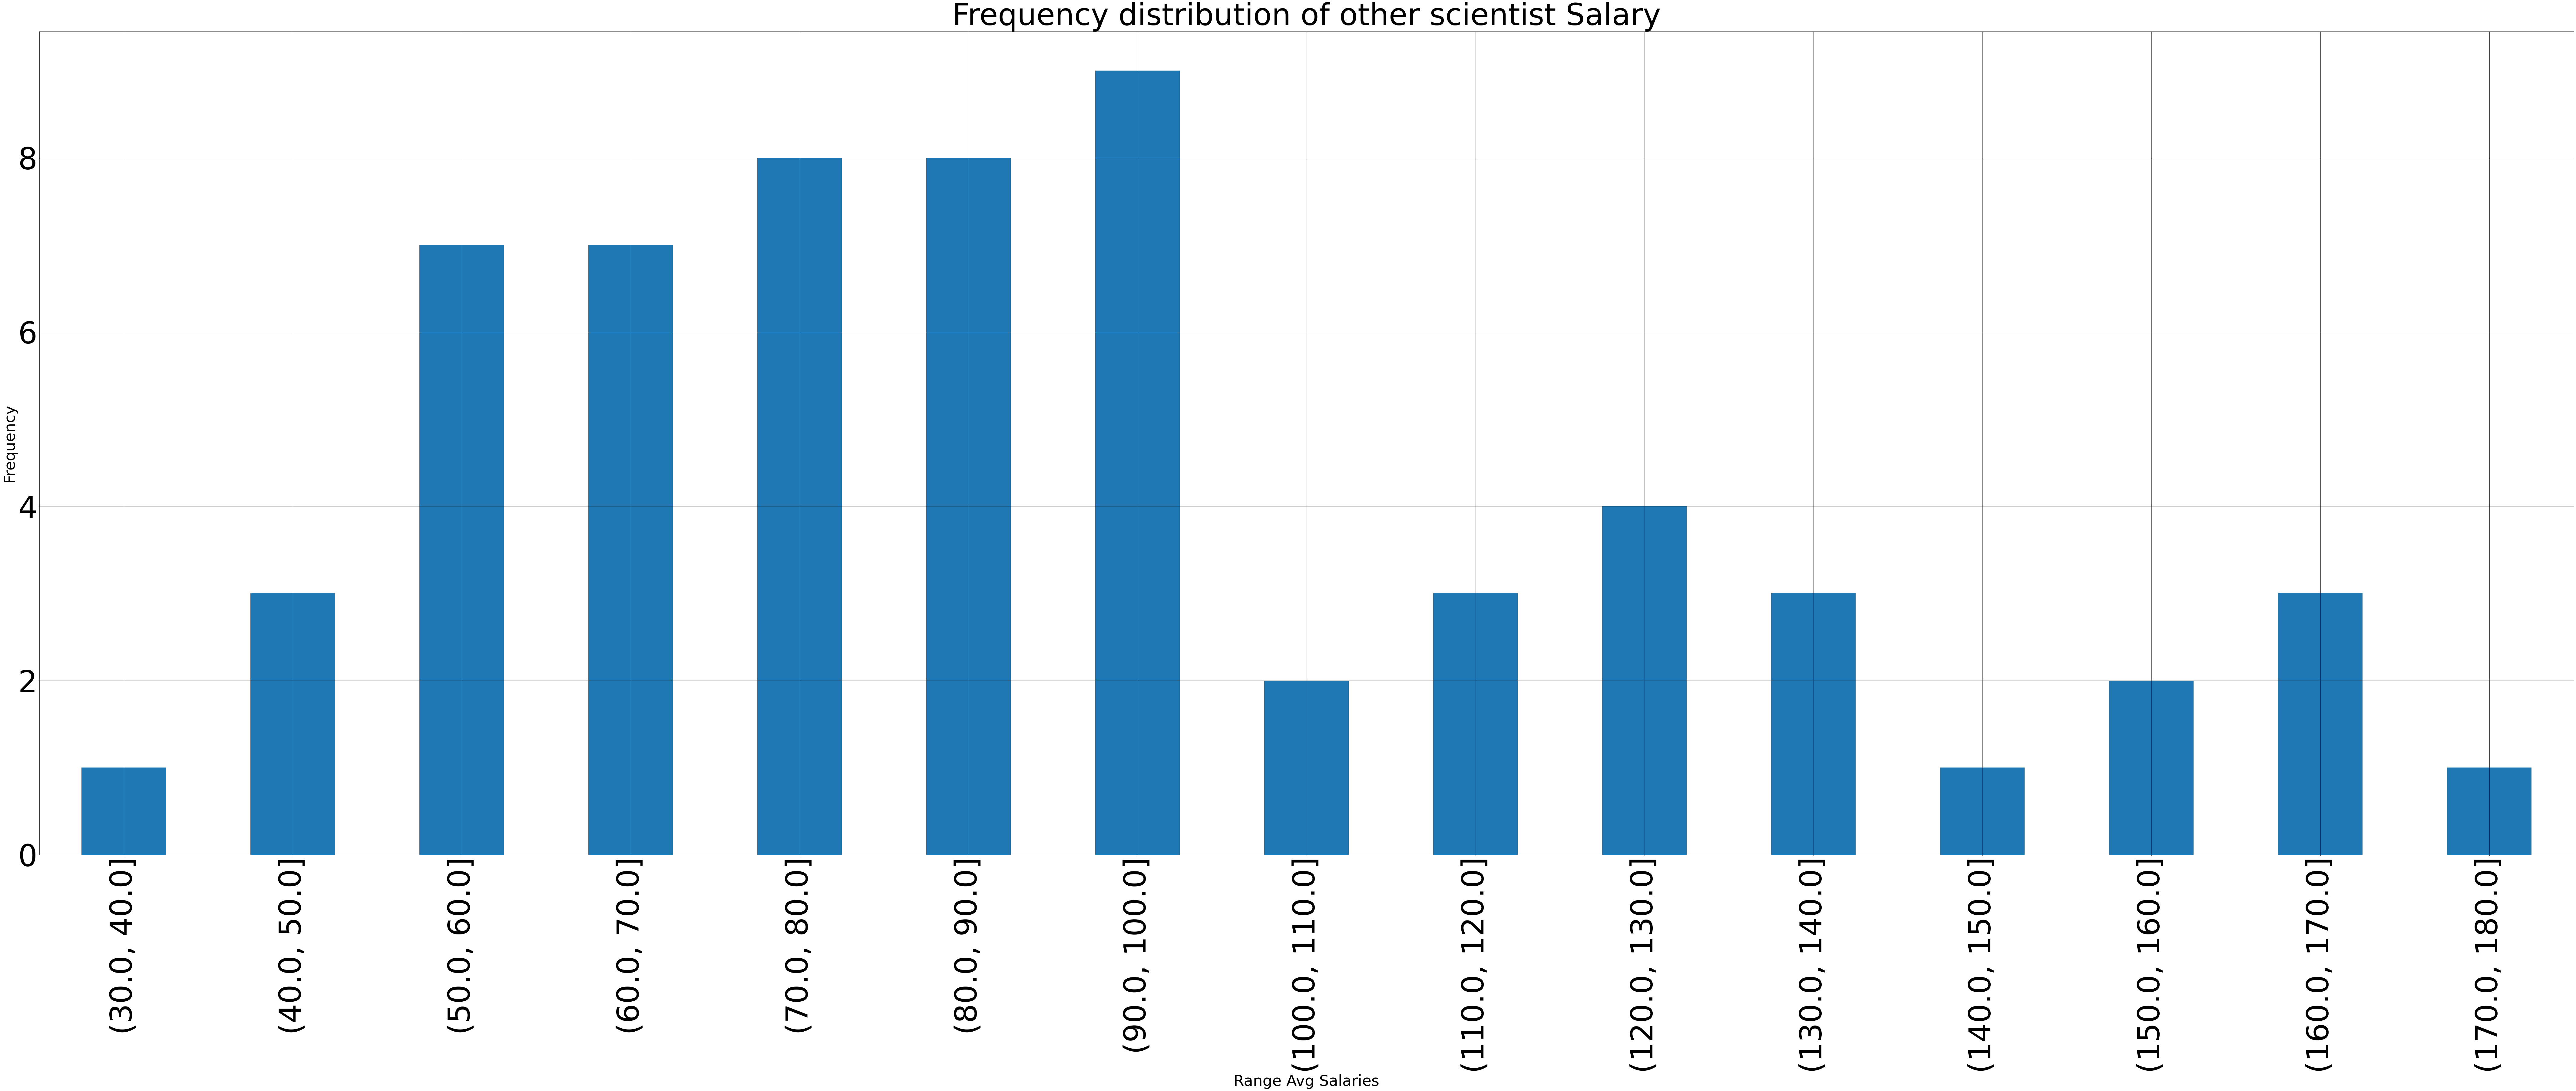

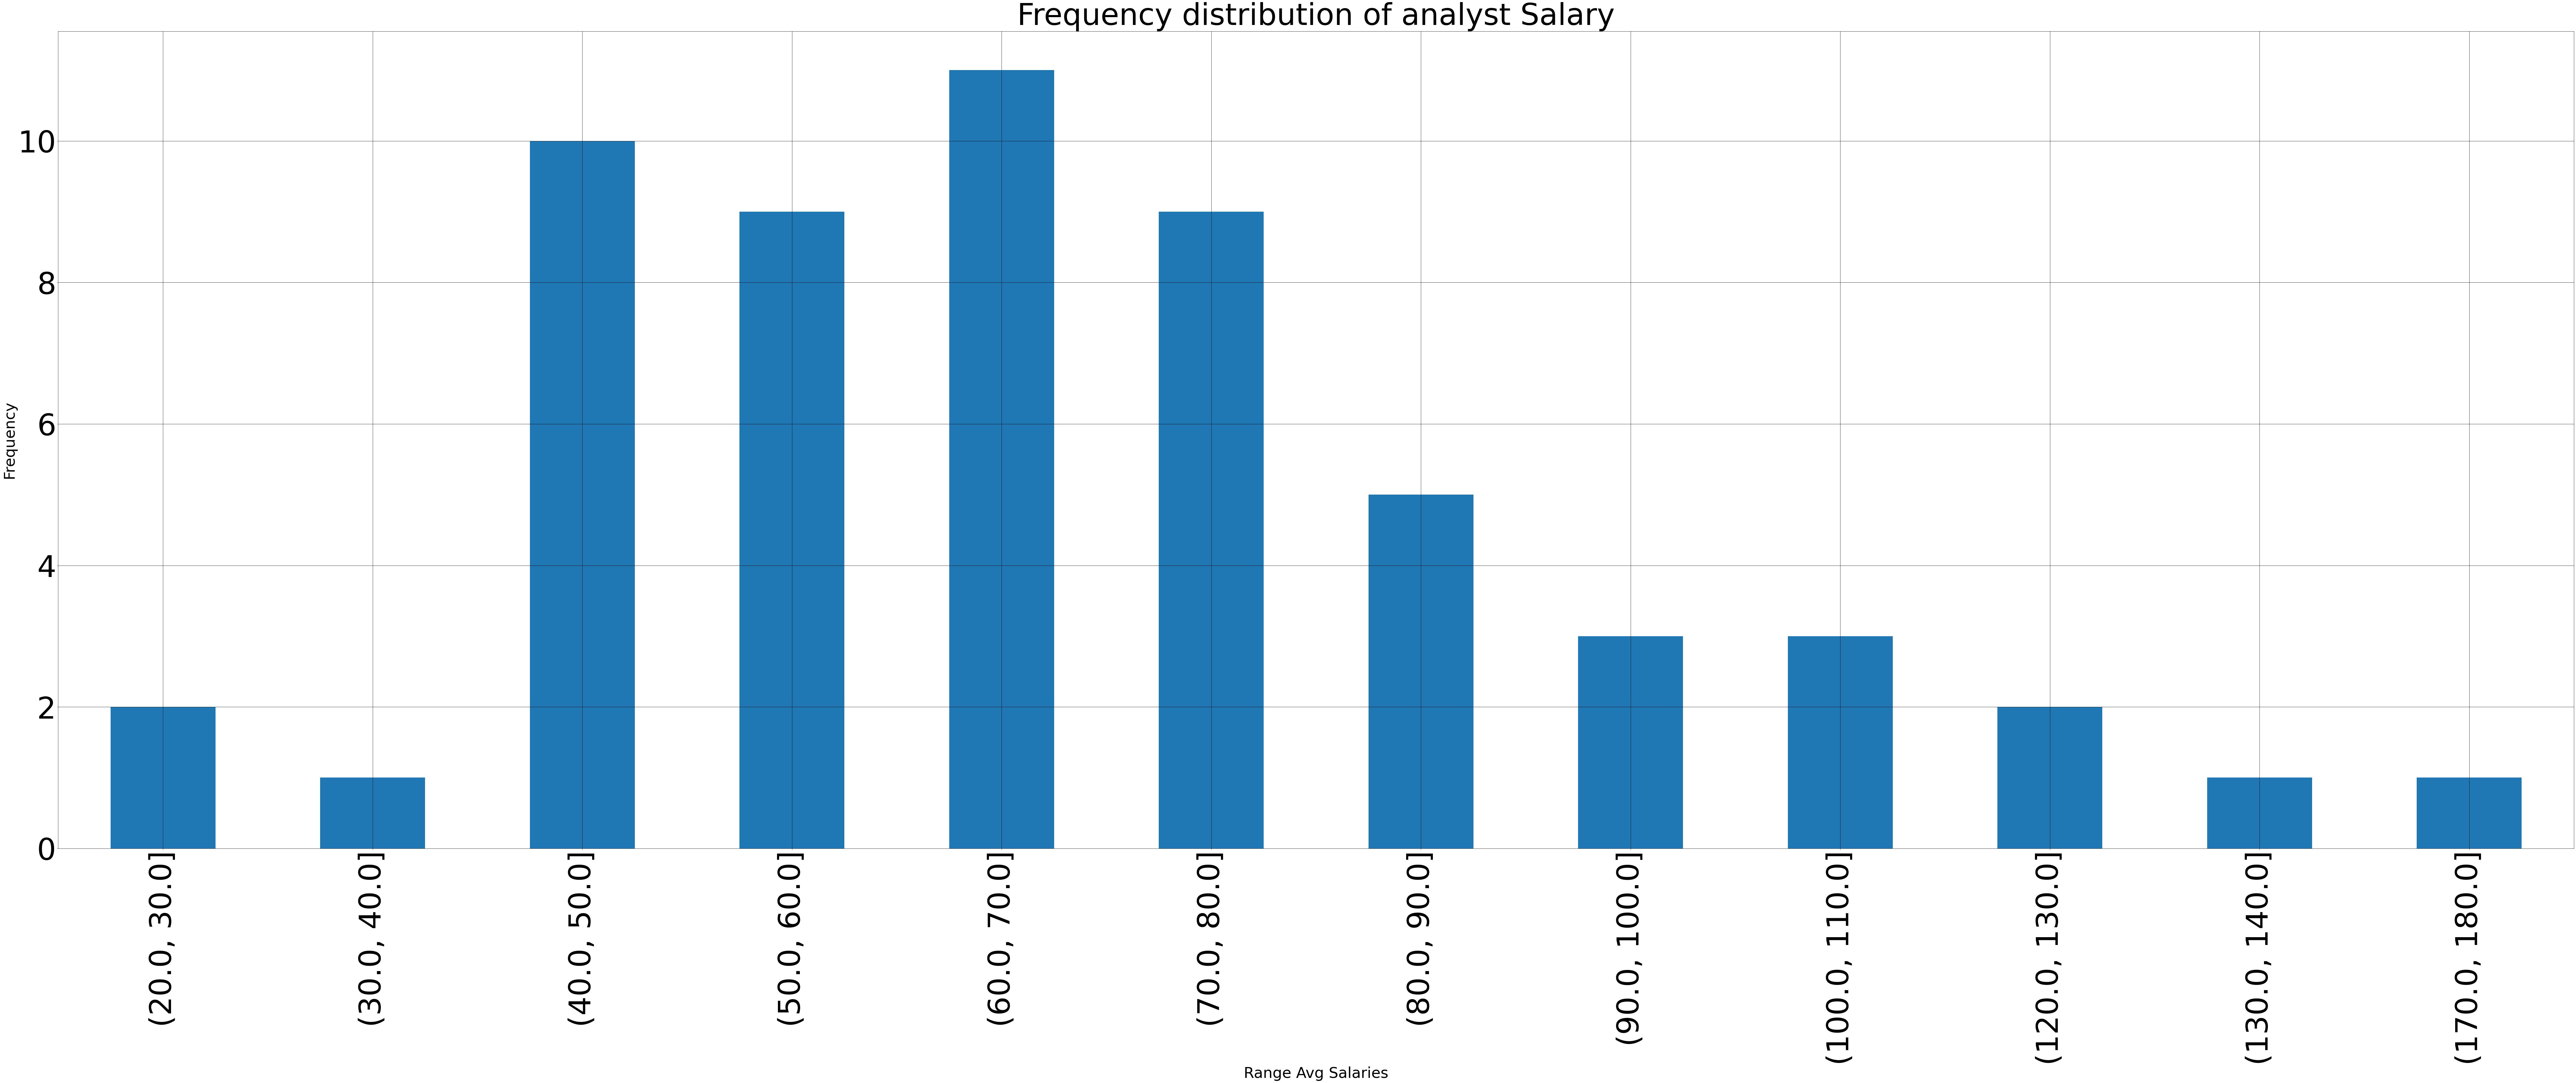

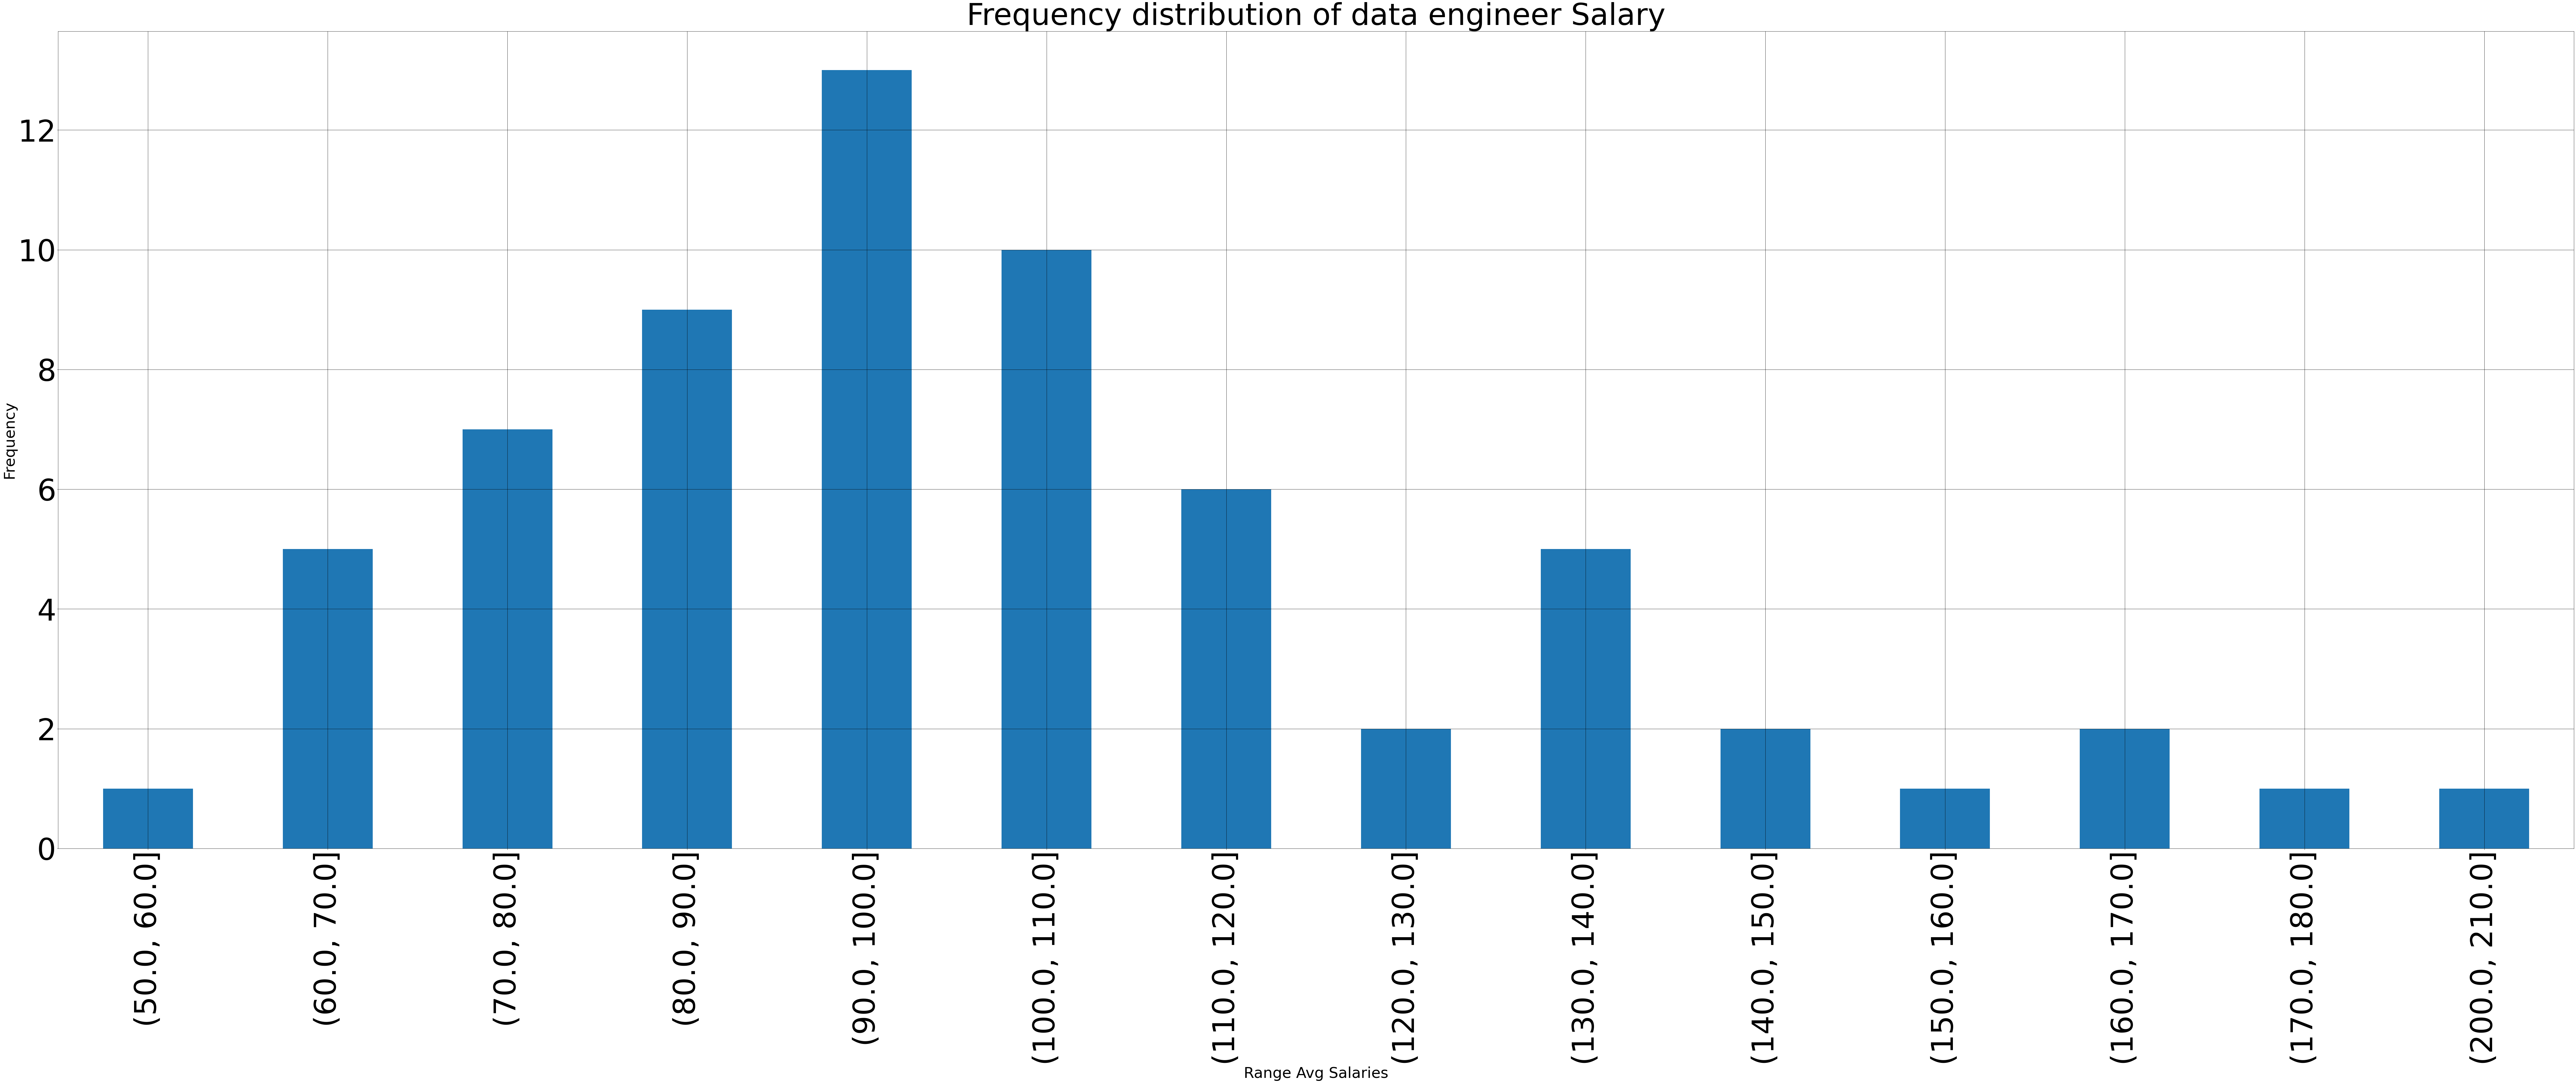

<Figure size 432x288 with 0 Axes>

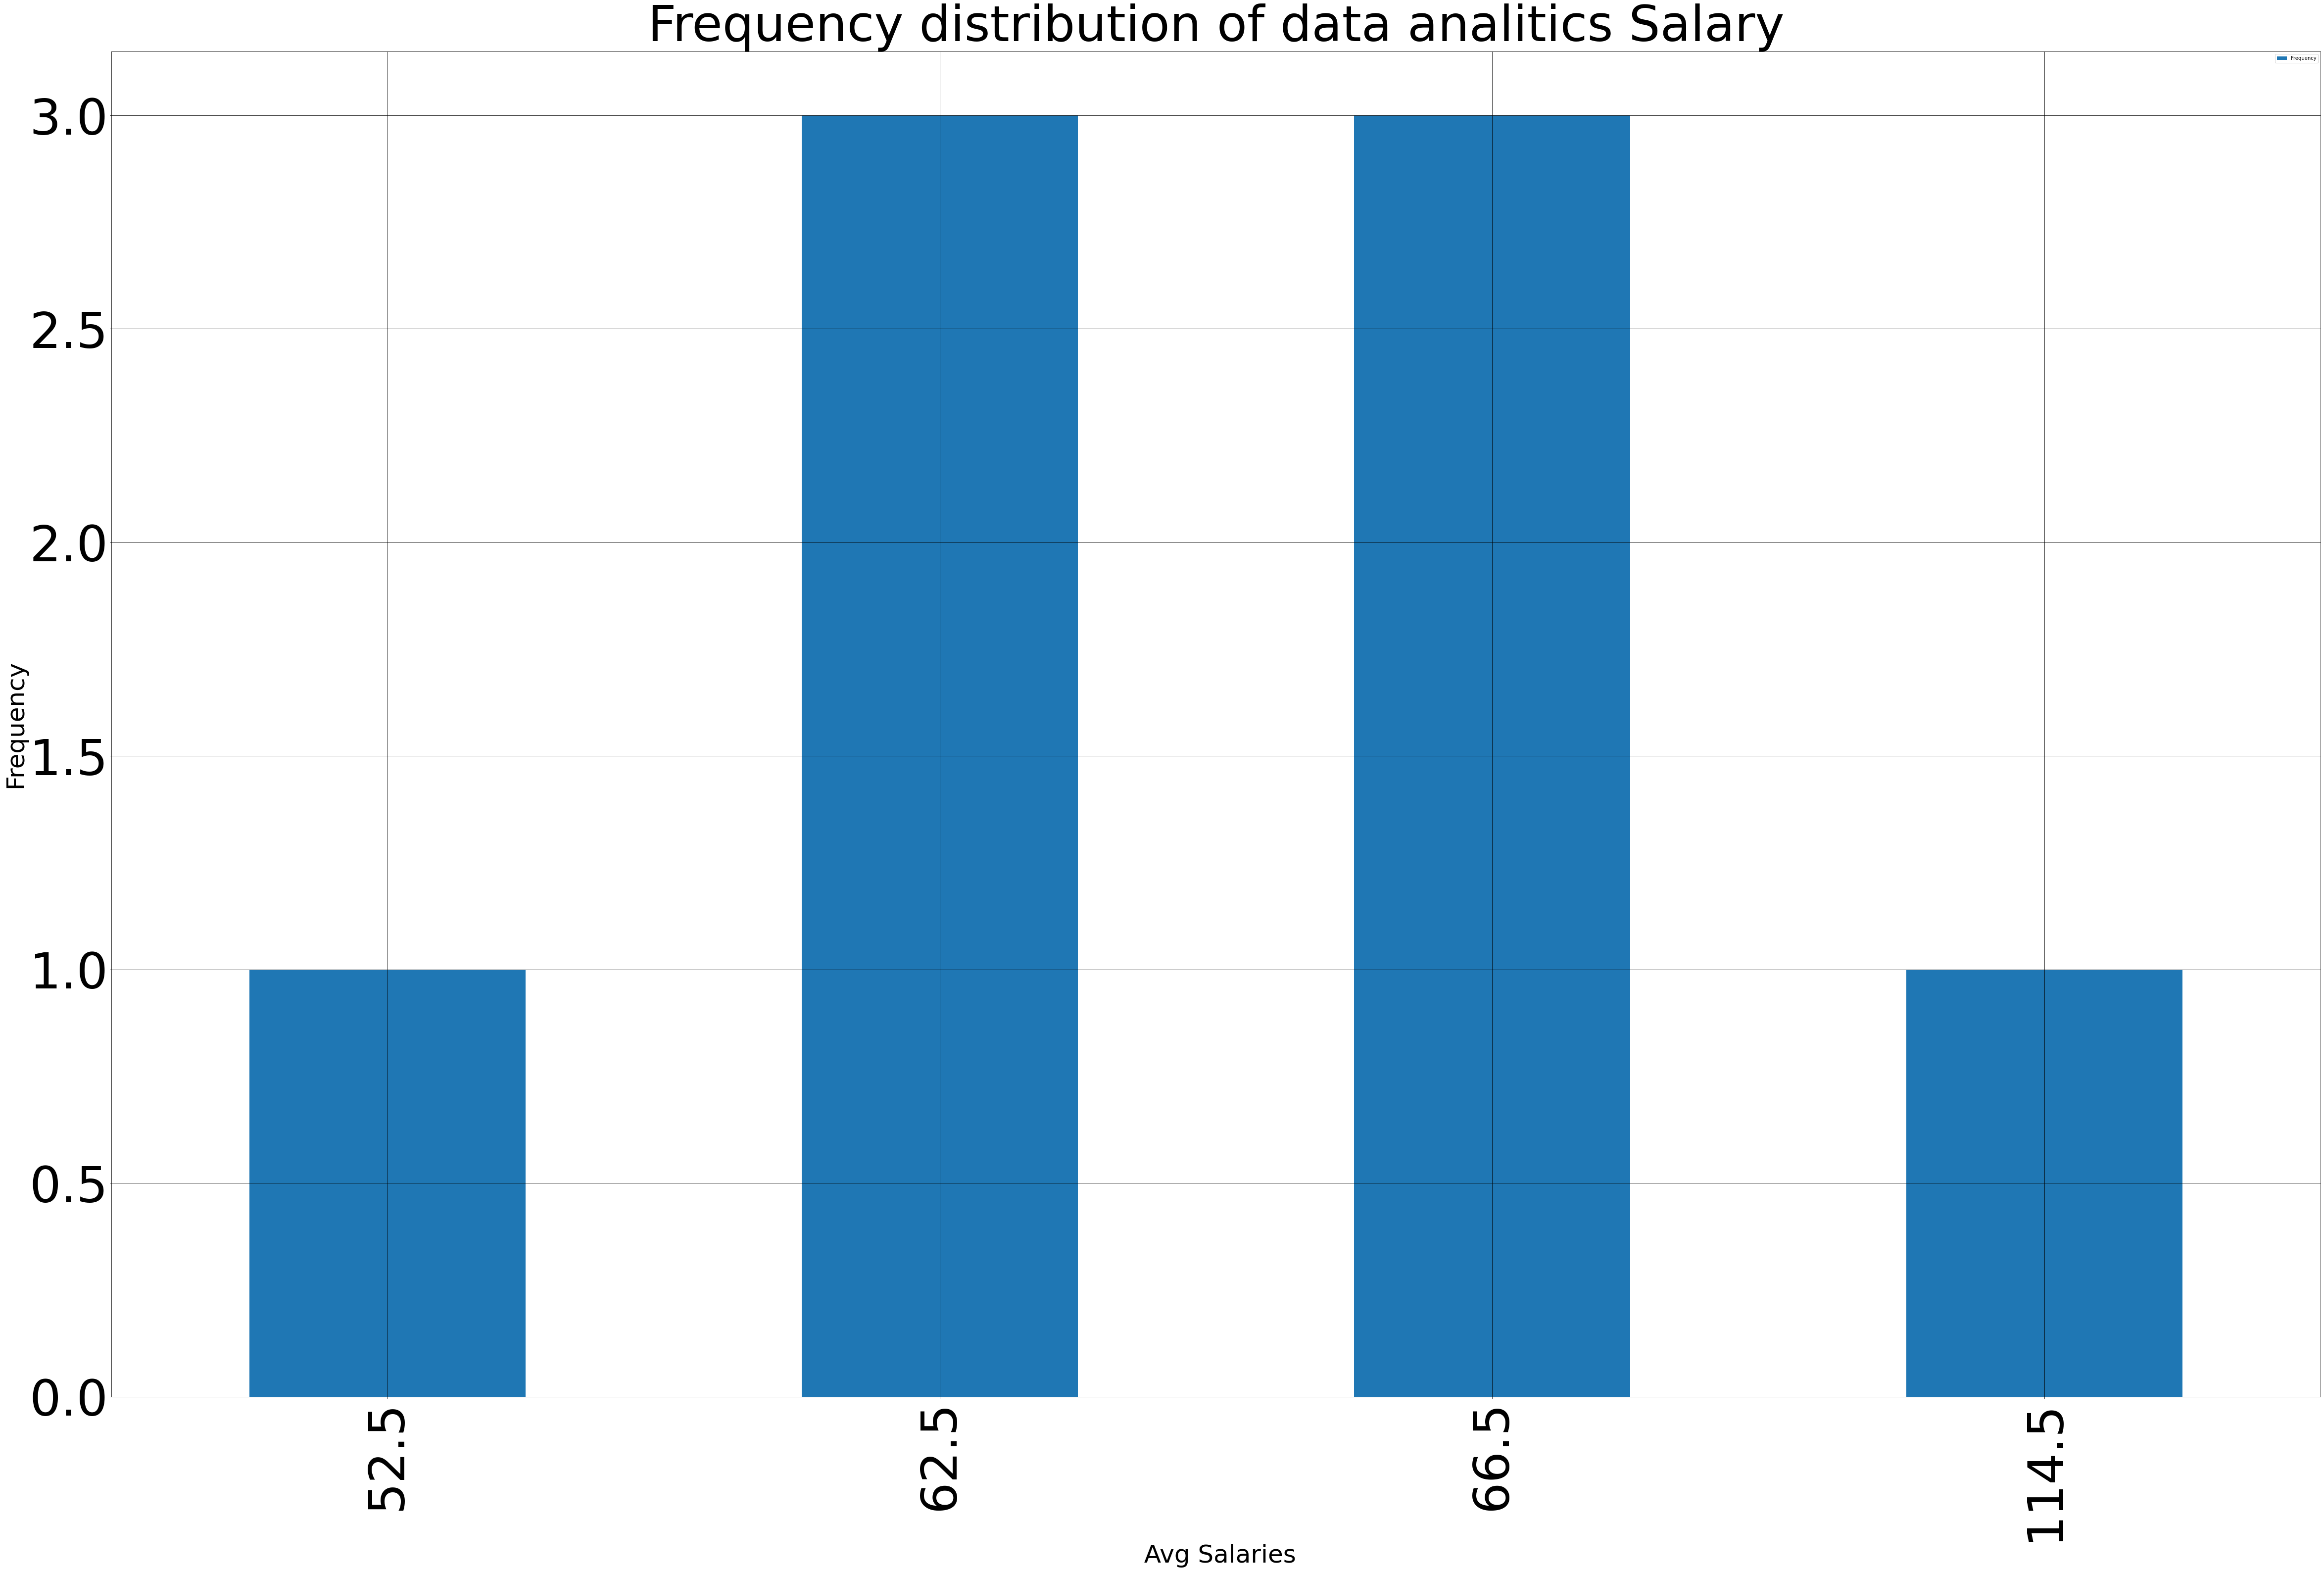

<Figure size 432x288 with 0 Axes>

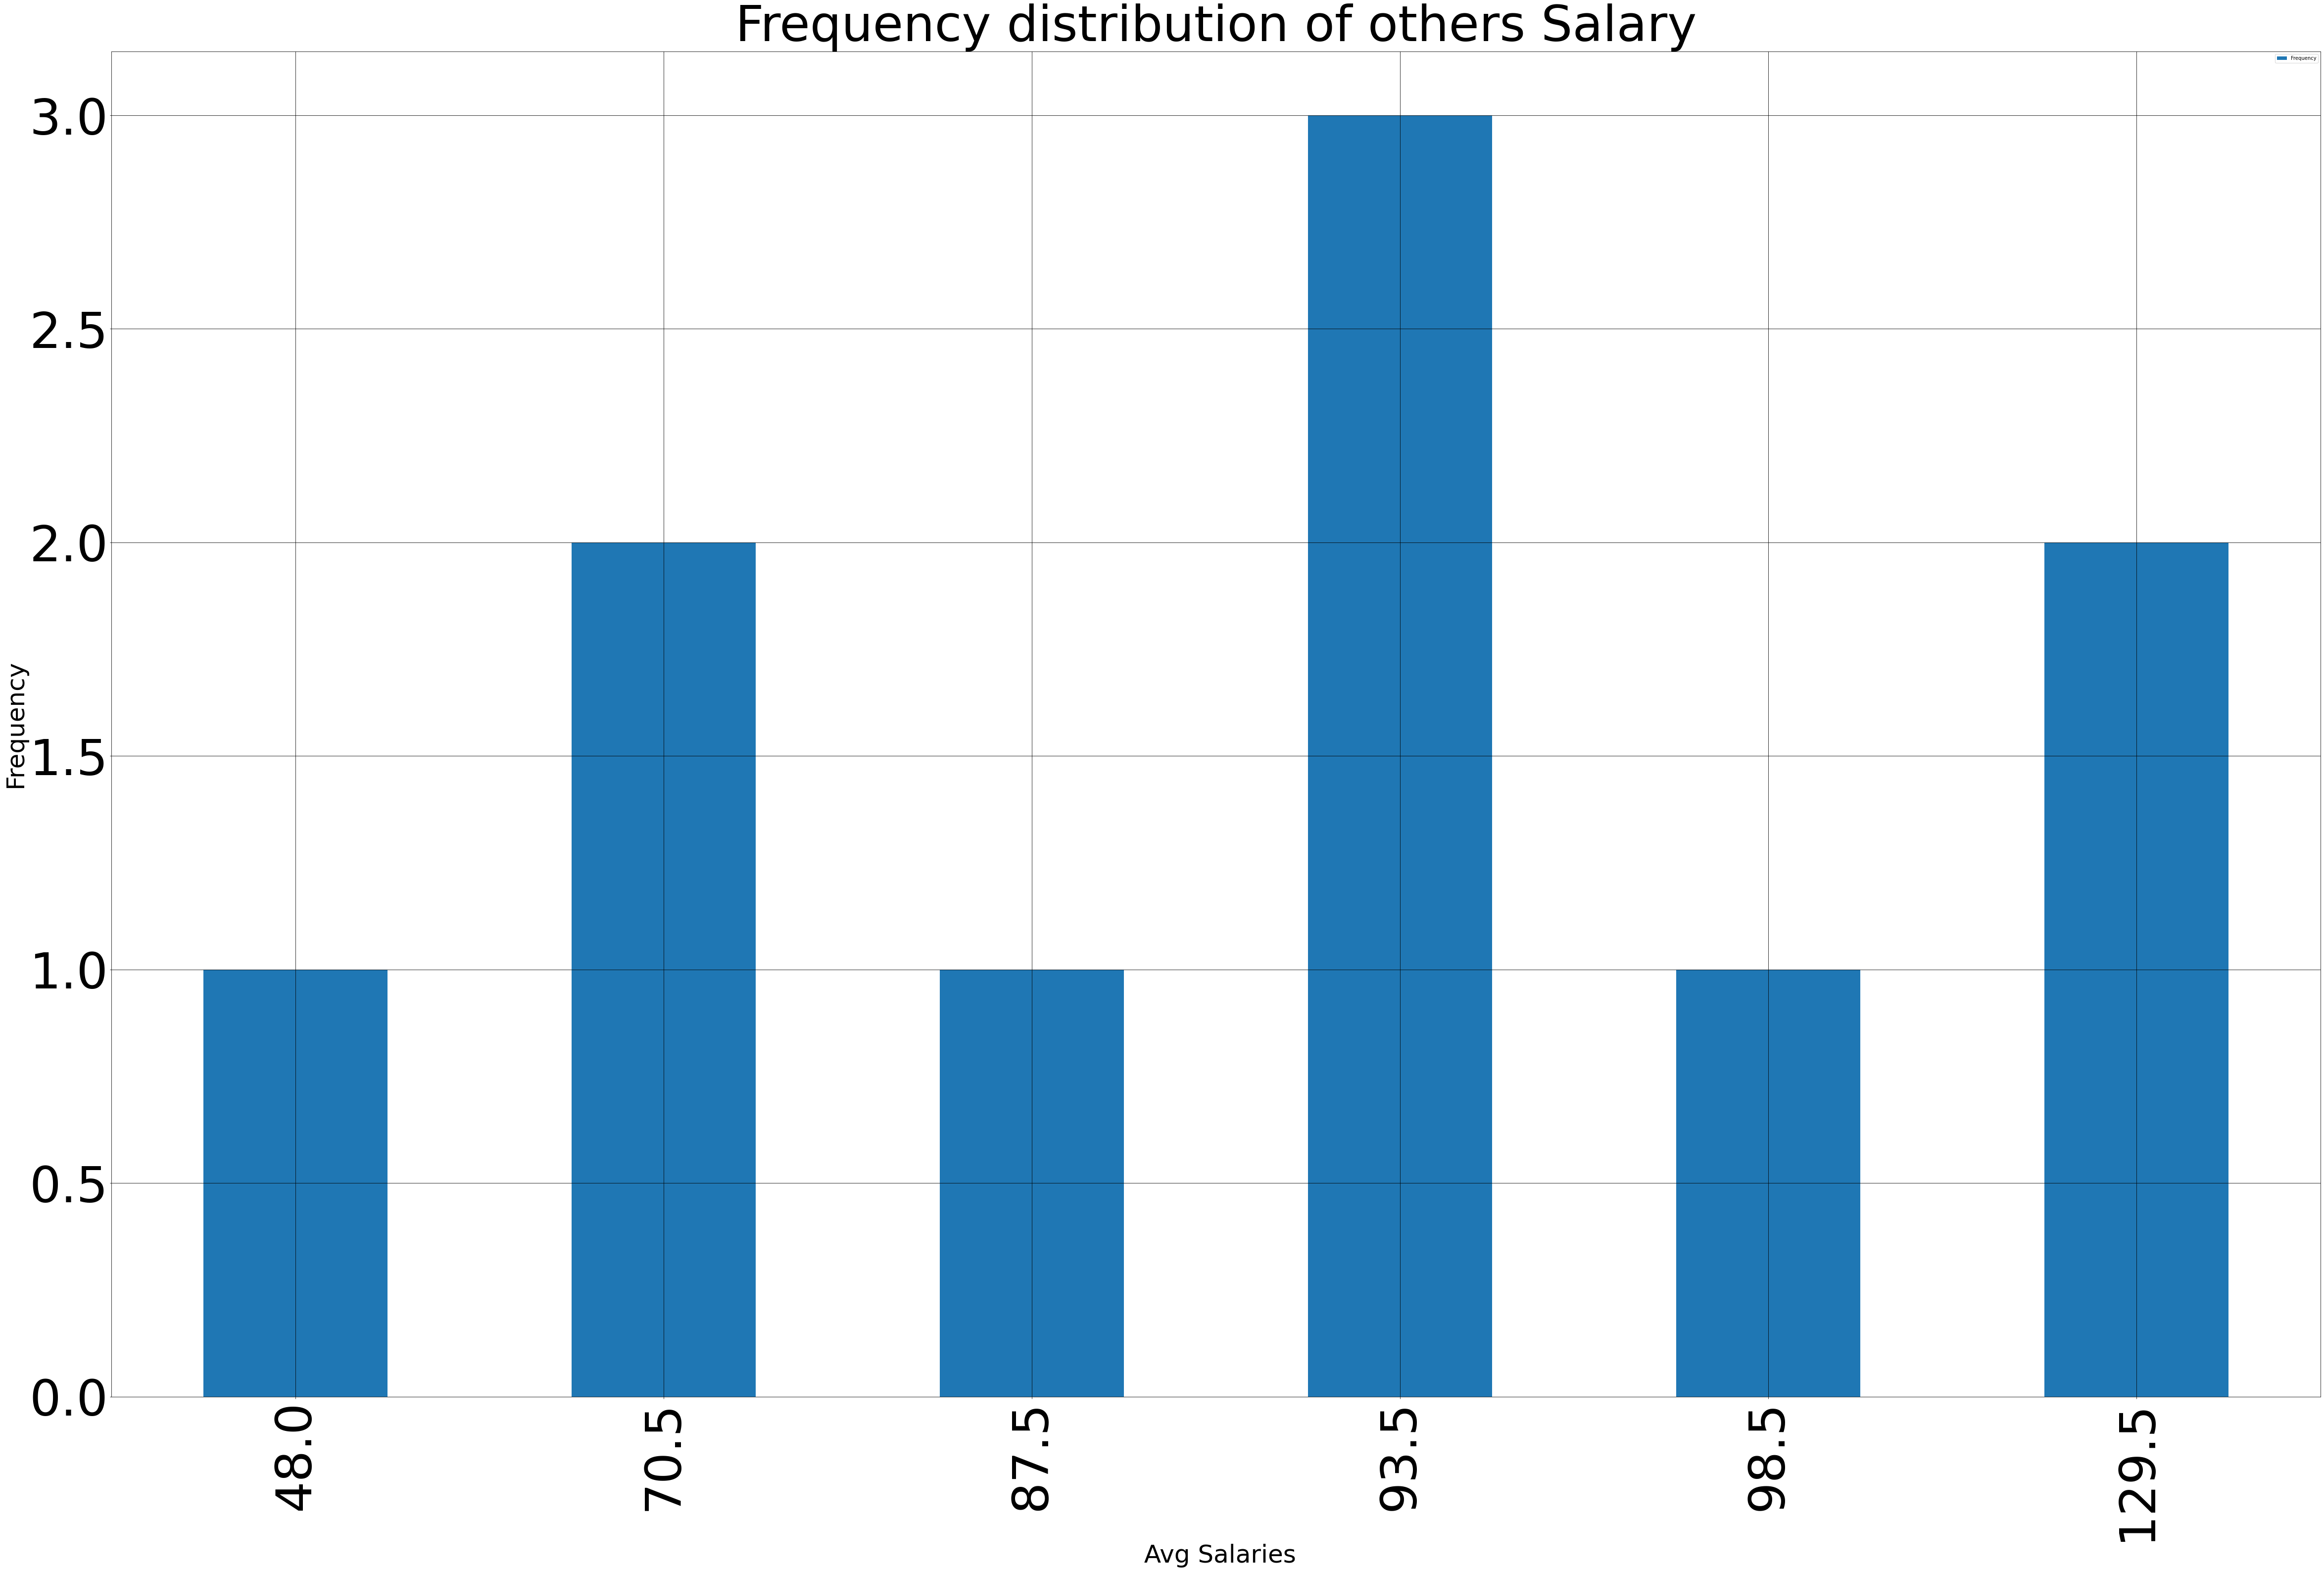

<Figure size 432x288 with 0 Axes>

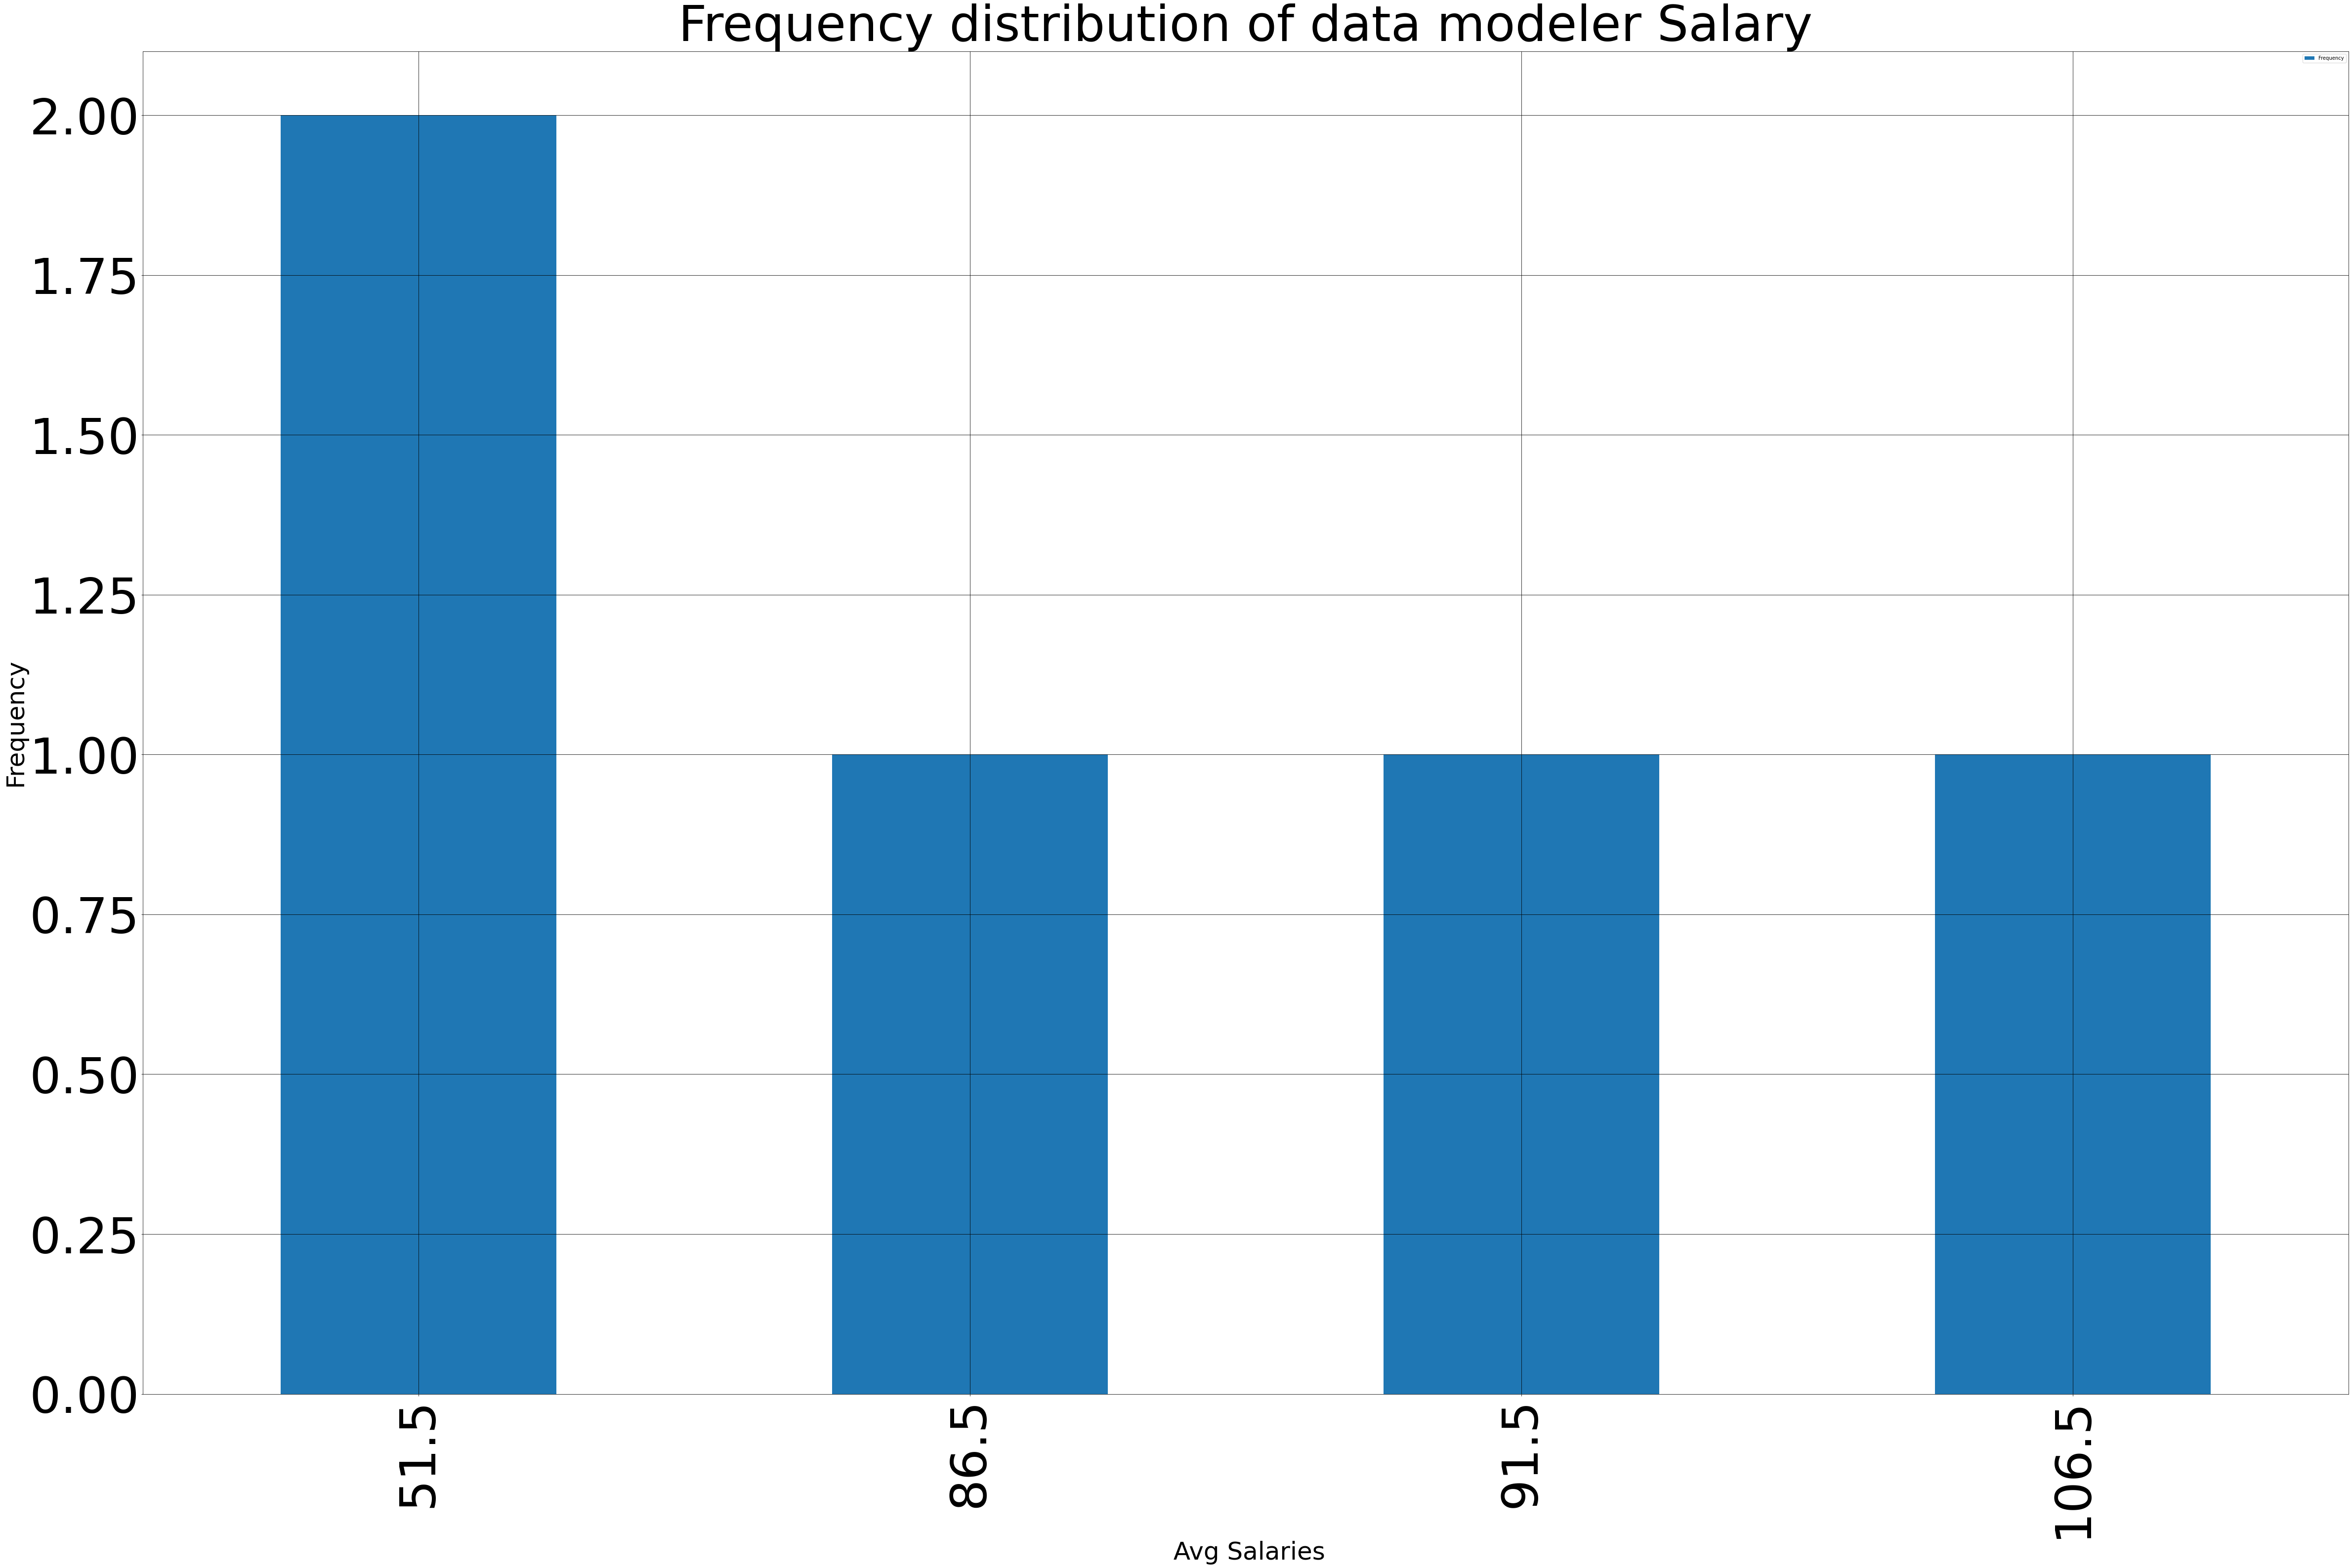

<Figure size 432x288 with 0 Axes>

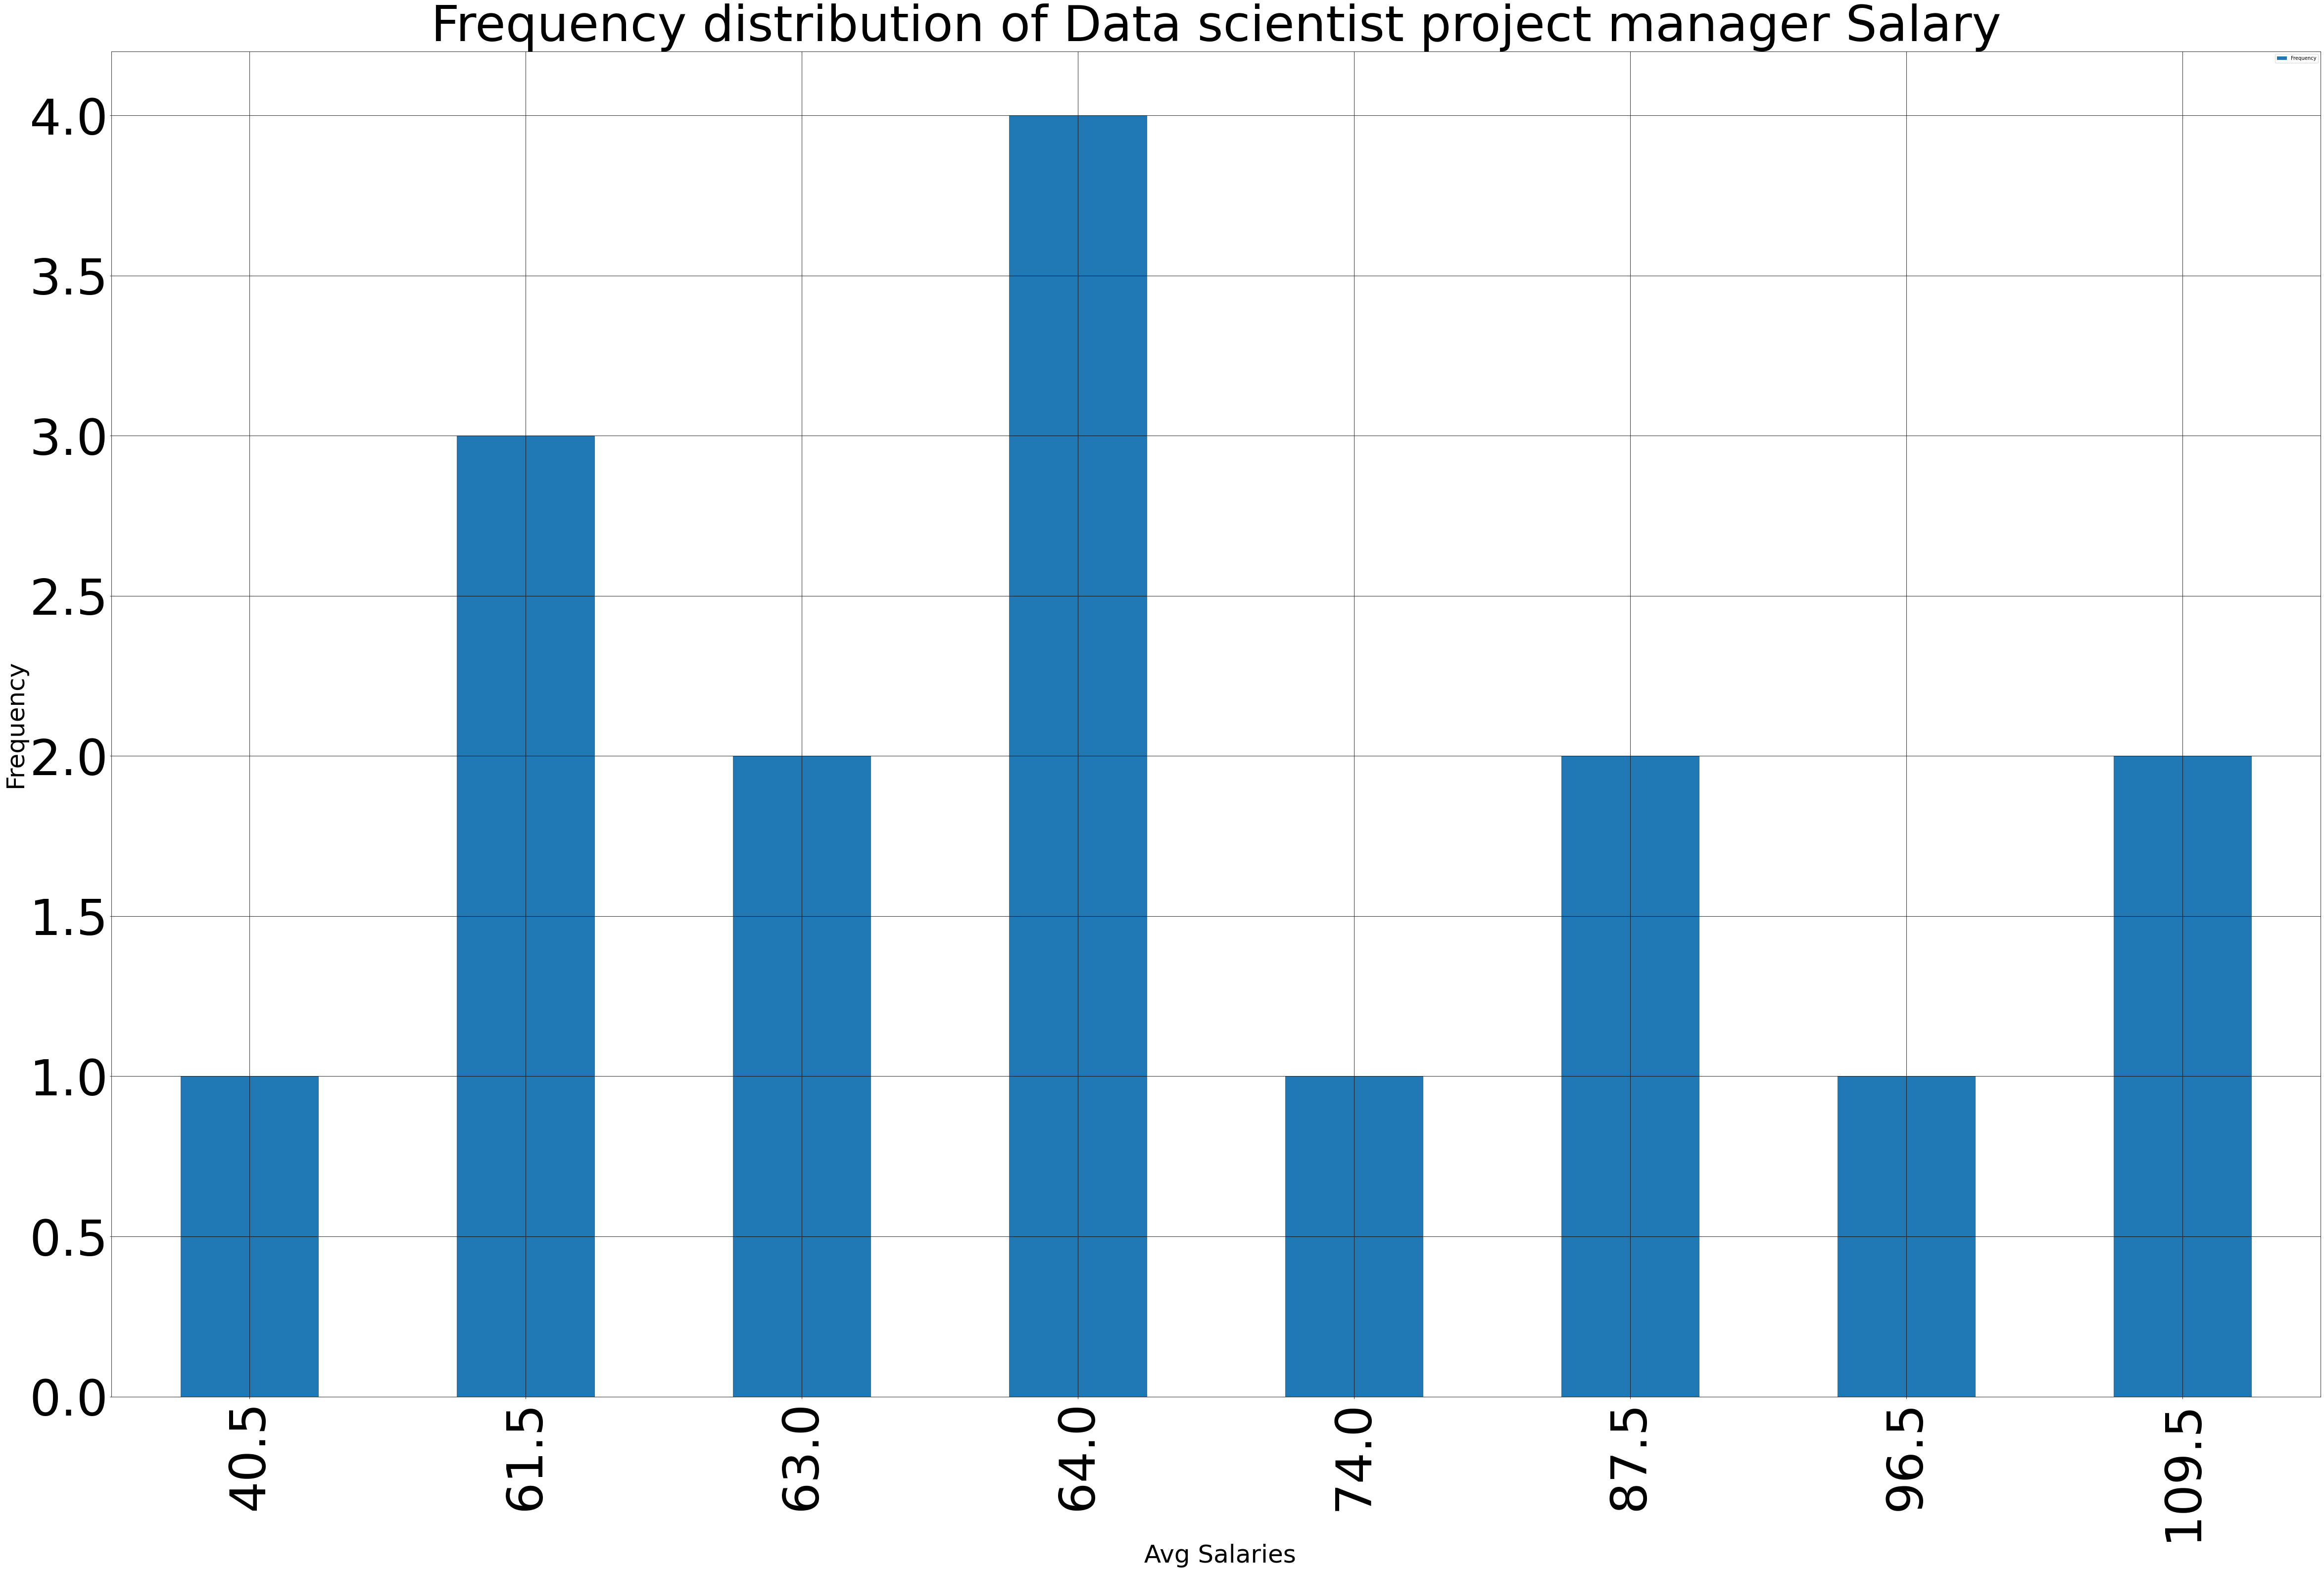

<Figure size 432x288 with 0 Axes>

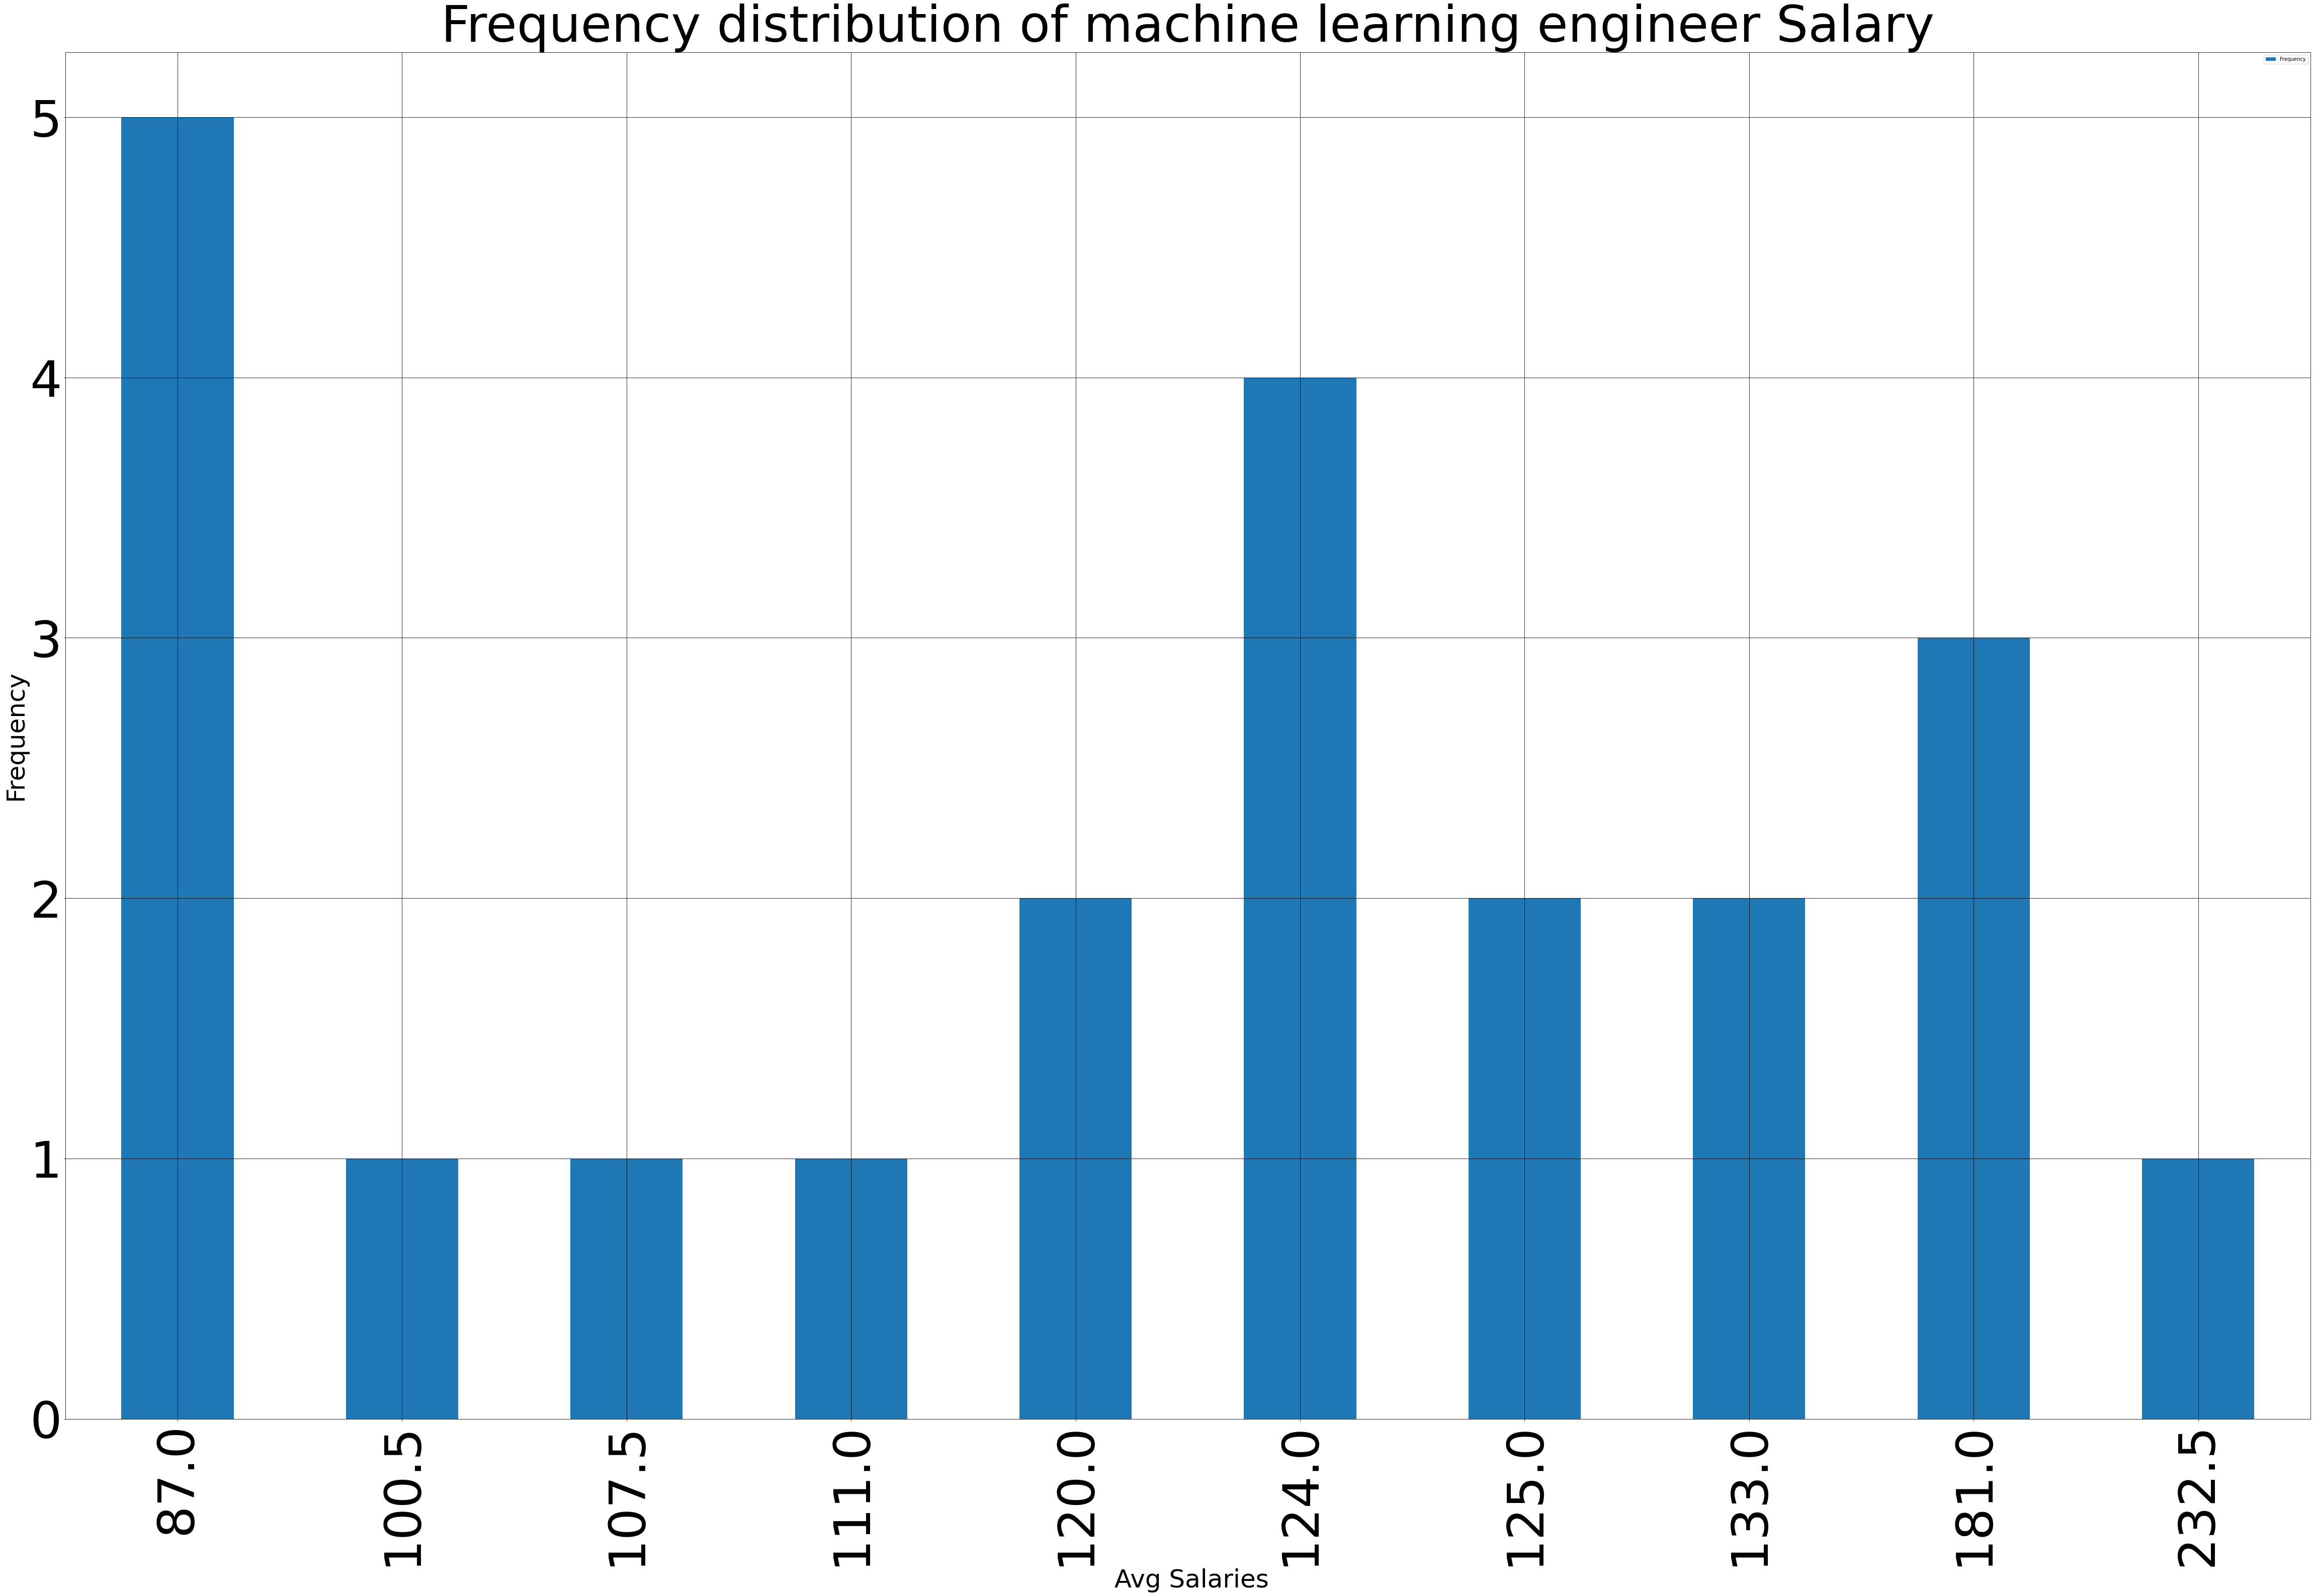

In [392]:
plot_salaryFreqDistJobRoles(salary_range_groups,job_roles)

In this analysis we are focus on data scientis salaris and we can use the 3 datasets regarin the year of 2021.
So we get only data from 2021 and merge them in a single data frame to finally get a distribution of data sicentis salary at this year.

In [30]:
#from glassdoor 
glassdoor_ds_salaries_df = glassdoor_df.copy(deep=True)[glassdoor_df['job_title_sim'] == 'data scientist'][['Avg Salary(K)','Frequency']]
glassdoor_ds_salaries_df.columns  = ['salary','frequency']
glassdoor_ds_salaries_df['salary'] = glassdoor_ds_salaries_df['salary'].apply(lambda x: np.int64(x)*1000)

#from h1bdata
h1bdata_ds_salaries_df = pd.DataFrame(h1bdata_df['salary'].copy(deep=True))
h1bdata_ds_salaries_df['Frequency'] = 1
h1bdata_ds_salaries_df.columns = ['salary','frequency']

#from ai salaries
filter =  salary_ai_df['job_title'].apply(lambda x:  'data science' in x.lower() or 'data scientist' in x.lower() ).values
salary_ai_ds_salaries_df = salary_ai_df.copy(deep=True)[filter][['salary','work_year']]
salary_ai_ds_salaries_df = pd.DataFrame(salary_ai_ds_salaries_df[salary_ai_ds_salaries_df['work_year'] == 2021]['salary'])
salary_ai_ds_salaries_df['Frequency'] = 1
salary_ai_ds_salaries_df.columns = ['salary','frequency']
salary_ai_ds_salaries_df
salaries_ds_2021_df = pd.concat([glassdoor_ds_salaries_df,h1bdata_ds_salaries_df,salary_ai_ds_salaries_df])
salaries_ds_2021_df['job_role'] =  'data scientist'
salaries_ds_2021_df = salaries_ds_2021_df.groupby(['job_role','salary']).sum()


30400000


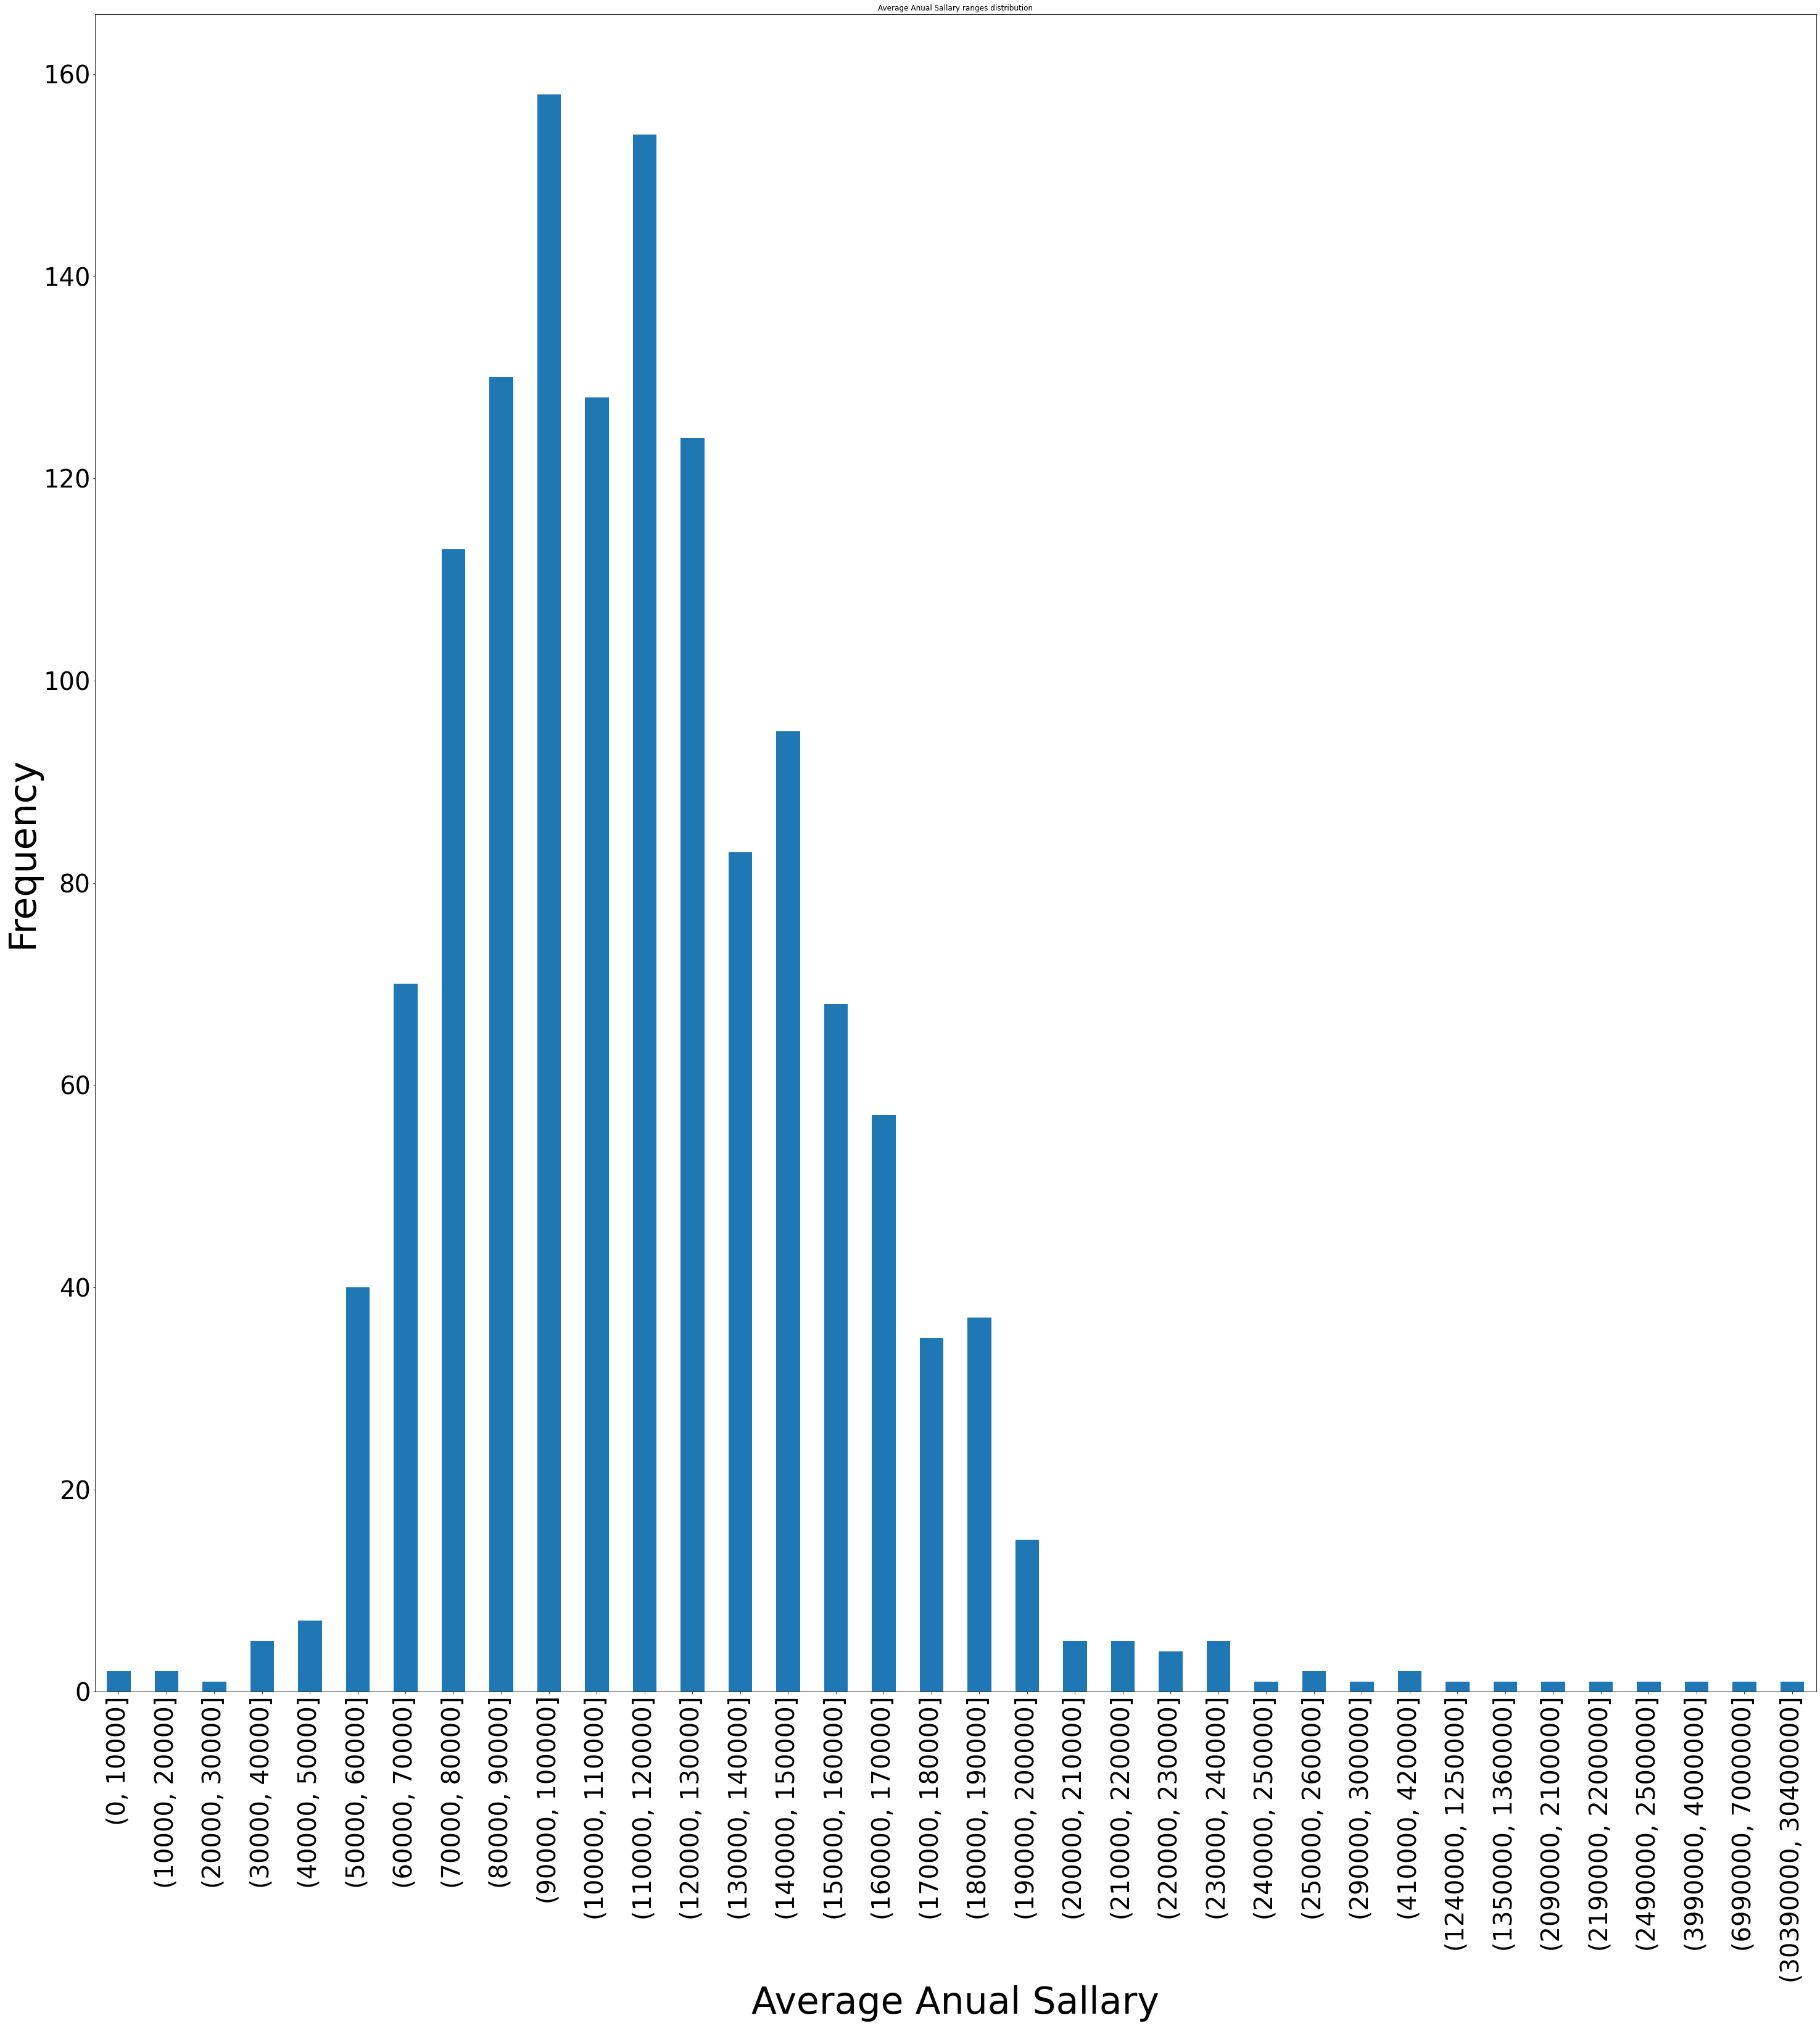

In [393]:
freq_dist_annual_ranges_salary_ds_df = groupby_range(salaries_ds_2021_df.loc['data scientist'].reset_index(),'salary','frequency',10000)

#eliminate outliers



ax=freq_dist_annual_ranges_salary_ds_df['frequency'].plot(kind='bar', figsize=(50,50))
plt.title("Average Anual Sallary ranges distribution")
plt.xlabel("Average Anual Sallary", fontsize=60)
plt.ylabel("Frequency", fontsize=60)
ax.tick_params(axis='both', which='major', labelsize=40)

In [394]:
freq_dist_annual_ranges_salary_ds_df

frequency
ranges                         
(0, 10000]                    2
(10000, 20000]                2
(20000, 30000]                1
(30000, 40000]                5
(40000, 50000]                7
(50000, 60000]               40
(60000, 70000]               70
(70000, 80000]              113
(80000, 90000]              130
(90000, 100000]             158
(100000, 110000]            128
(110000, 120000]            154
(120000, 130000]            124
(130000, 140000]             83
(140000, 150000]             95
(150000, 160000]             68
(160000, 170000]             57
(170000, 180000]             35
(180000, 190000]             37
(190000, 200000]             15
(200000, 210000]              5
(210000, 220000]              5
(220000, 230000]              4
(230000, 240000]              5
(240000, 250000]              1
(250000, 260000]              2
(290000, 300000]              1
(410000, 420000]              2
(1240000, 1250000]            1
(1350000, 1360000]            1
(2090000, 2100000]            1
(2190000, 2200000]            1
(2490000, 2500000]            1
(3990000, 4000000]            1
(6990000, 7000000]            1
(30390000, 30400000]          1

I found out some absurda values for a data scient earns anually, it can be somehow possible but it's very likelly. These guys are endeed outiliers and we need get rid of them, I think a suitable range anual salary for data scientis is something between US 60K and US 500K , so let's filter the value out of this range

In [71]:
#take out the outliers from dataset

suit_ranges = freq_dist_annual_ranges_salary_ds_df.index.values[6:28]
freq_dist_annual_ranges_salary_ds_df  = freq_dist_annual_ranges_salary_ds_df[freq_dist_annual_ranges_salary_ds_df.index.isin(suit_ranges)]


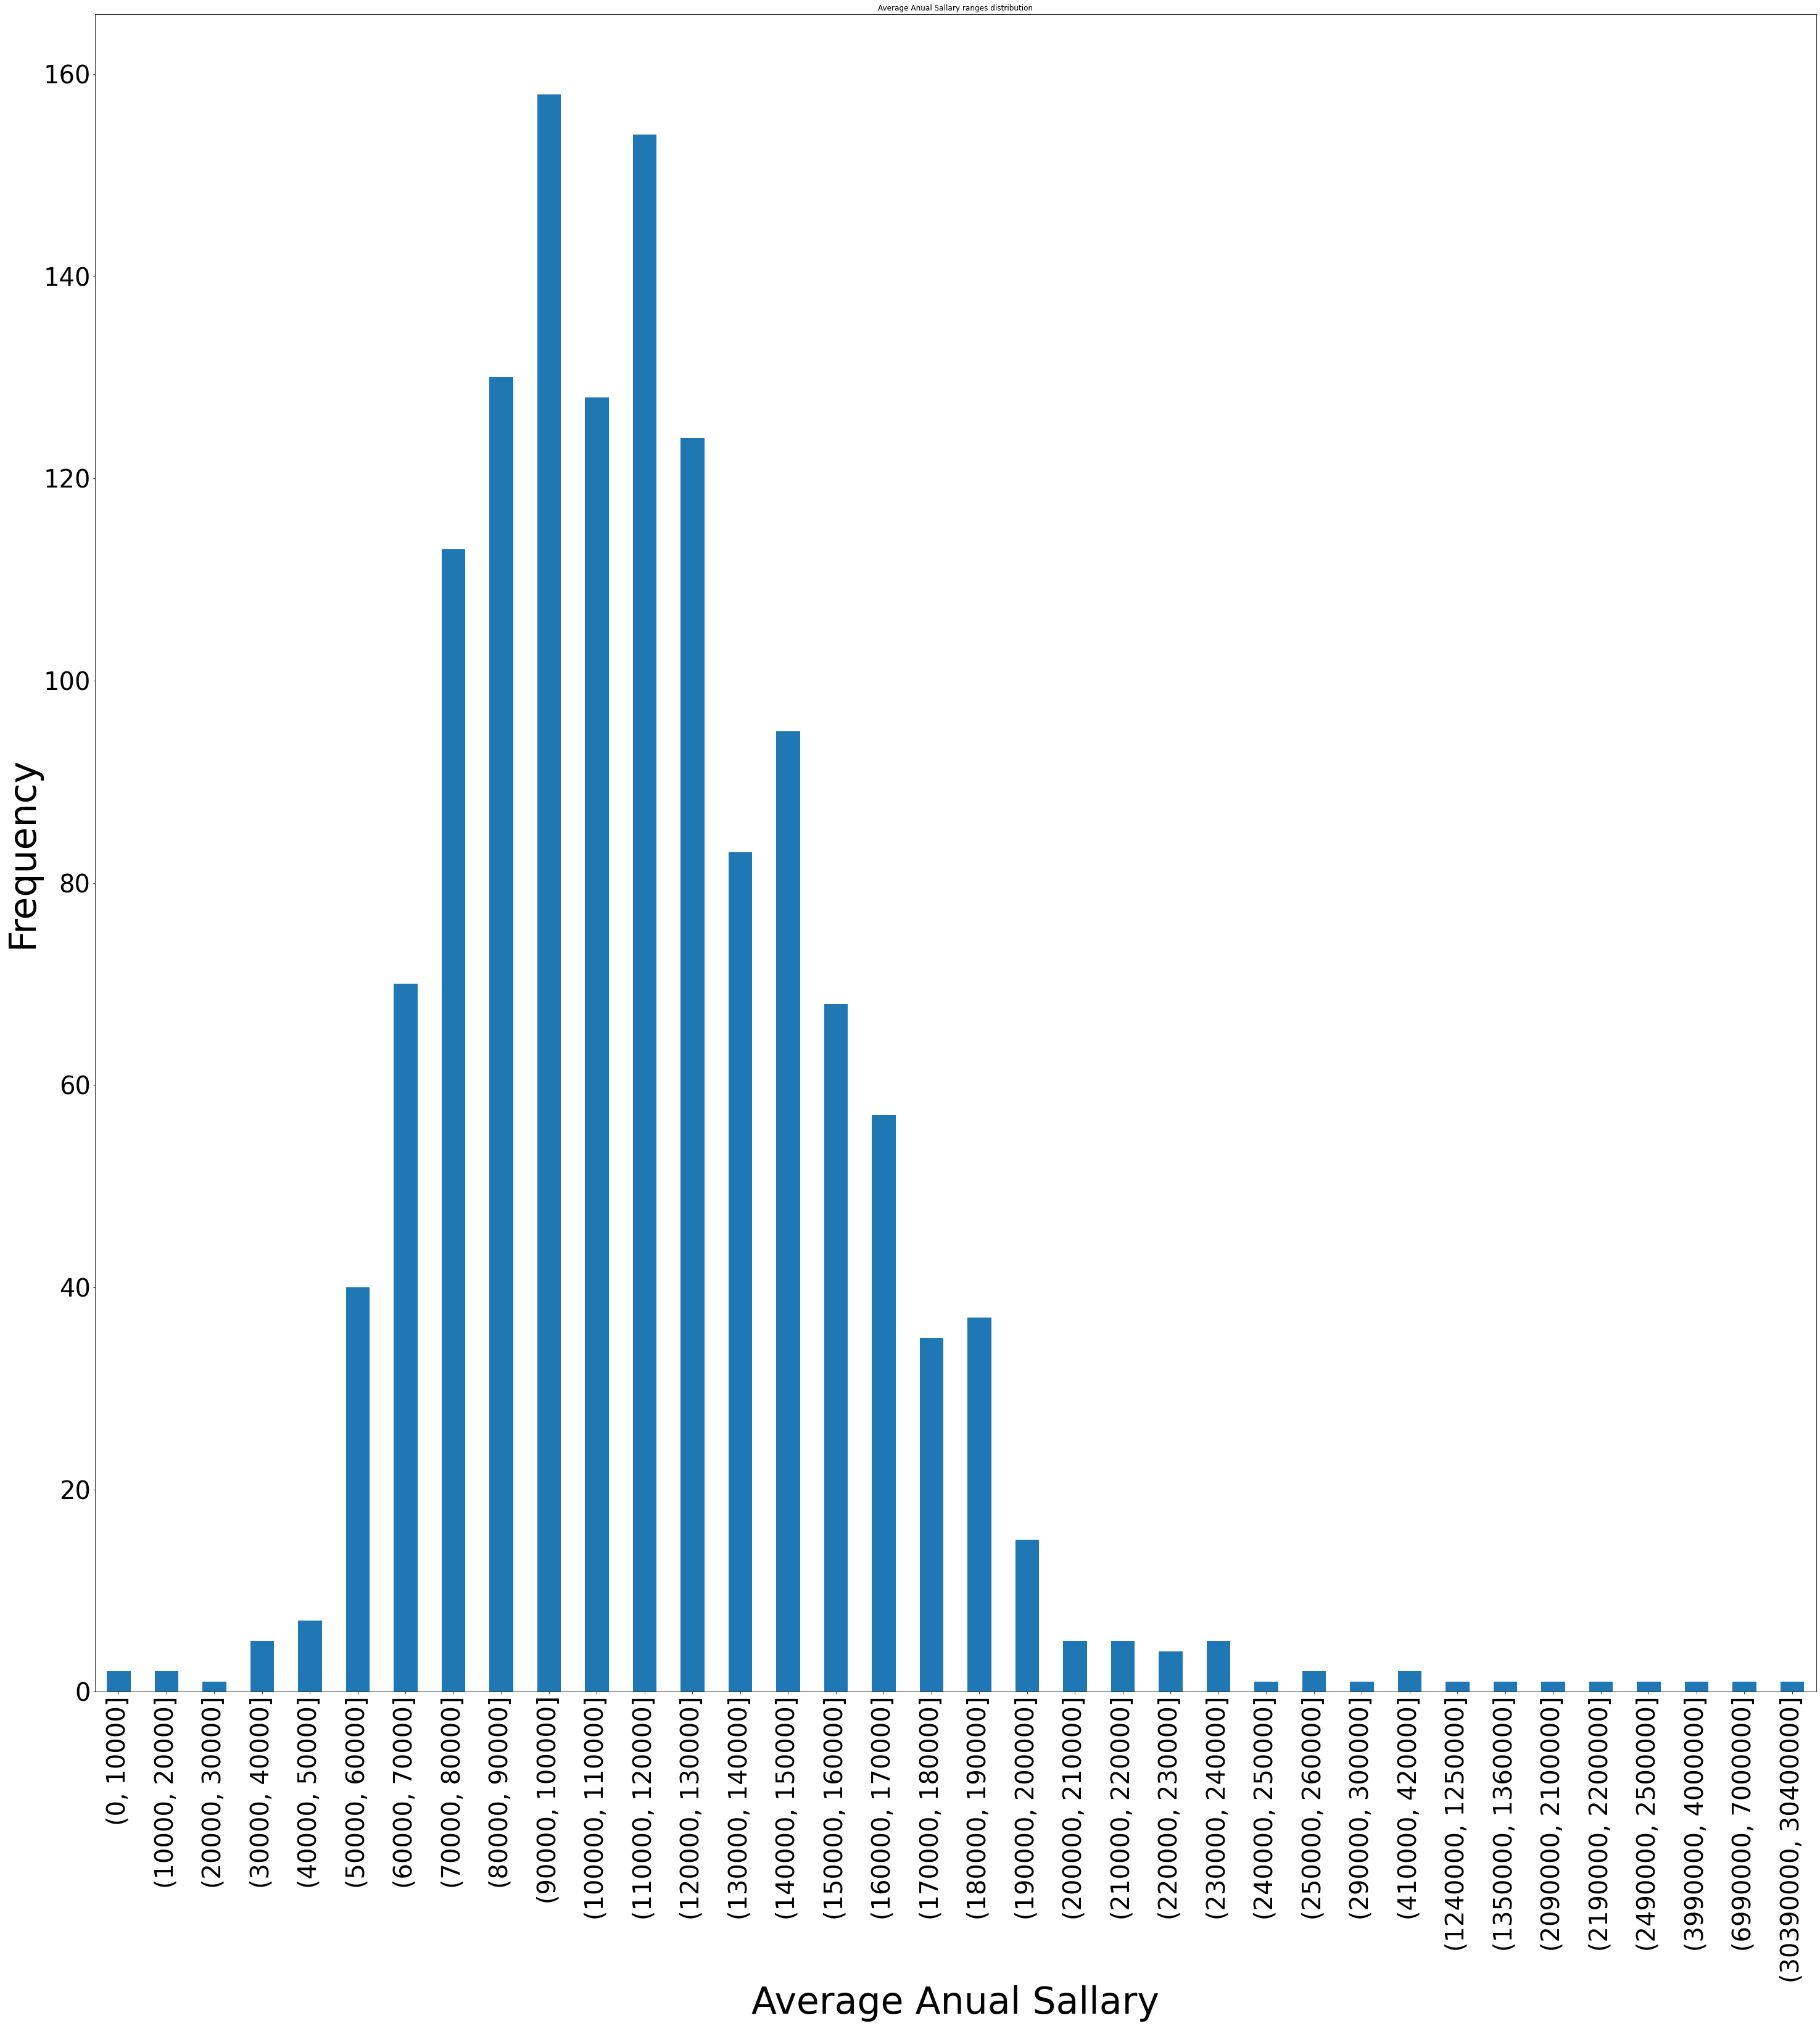

In [395]:

ax=freq_dist_annual_ranges_salary_ds_df['frequency'].plot(kind='bar', figsize=(50,50))
plt.title("Average Anual Sallary ranges distribution")
plt.xlabel("Average Anual Sallary", fontsize=60)
plt.ylabel("Frequency", fontsize=60)
ax.tick_params(axis='both', which='major', labelsize=40)

 ### Let's get some salries statist in general

#### The average

In [398]:
ds_salaries2021_df = salaries_ds_2021_df.loc['data scientist'].reset_index()
print("Average general Data scientist anual salary: $%.2f" %round(ds_salaries2021_df['salary'].mean(),2))
print("Average general Data scientist msalary: $%.2f" %round(ds_salaries2021_df['salary'].mean()/13,2))


Average general Data scientist anual salary: $151919.76
Average general Data scientist msalary: $11686.14


#### The most frequent salary

In [399]:
freq_dist_annual_ranges_salary_ds_df[ freq_dist_annual_ranges_salary_ds_df['frequency'] == freq_dist_annual_ranges_salary_ds_df['frequency'].max()]

frequency
ranges                    
(90000, 100000]        158

### Regarding the job roles in general who earn more in 2021?

Text(0, 0.5, 'Avg Sallary')

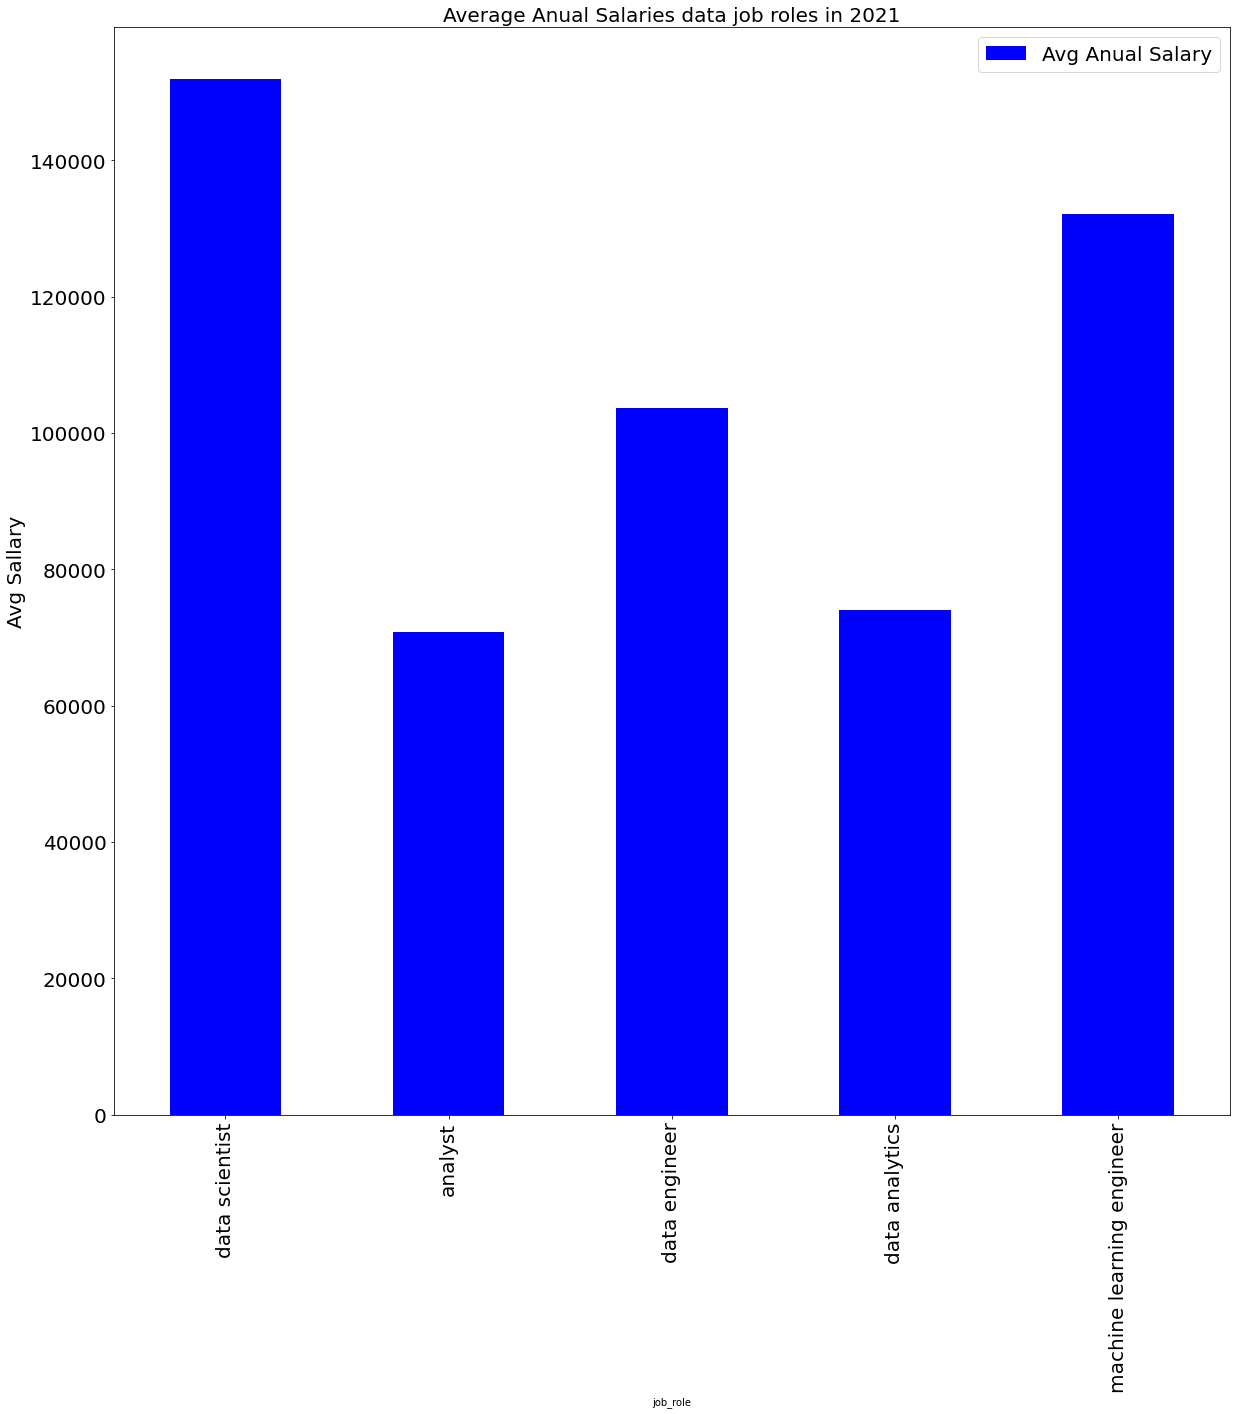

In [400]:


ds_avg_sal_2021 = round(ds_salaries2021_df['salary'].mean(),2)
analyst_avg_sal_2021 = round(salary_range_groups.loc['analyst'].reset_index()['Avg Salary(K)'].mean()*1e3,2)
data_engineer_avg_sal_2021 = round(salary_range_groups.loc['data engineer'].reset_index()['Avg Salary(K)'].mean()*1e3,2)
data_analitics_avg_sal_2021 = round(salary_range_groups.loc['data analitics'].reset_index()['Avg Salary(K)'].mean()*1e3,2)
machine_learning_engineer_avg_sal_2021 = round(salary_range_groups.loc['machine learning engineer'].reset_index()['Avg Salary(K)'].mean()*1e3,2)
data = [['data scientist',ds_avg_sal_2021],['analyst',analyst_avg_sal_2021], ['data engineer',data_engineer_avg_sal_2021],['data analytics',data_analitics_avg_sal_2021],['machine learning engineer',machine_learning_engineer_avg_sal_2021] ]
avgs_sals_df = pd.DataFrame(data, columns =['job_role', 'Avg Anual Salary'])

avgs_sals_df = avgs_sals_df.set_index('job_role')

ax = avgs_sals_df.plot(kind='bar', figsize=(20,20), color='blue')
ax.tick_params(axis='both', which='major', labelsize=20)
plt.legend(prop={'size': 20})
plt.title("Average Anual Salaries data job roles in 2021", fontsize=20)
plt.ylabel("Avg Sallary", fontsize=20)


As we can see above, in mean ,data scienst is the most remunerated job role follow by machine learning engineer.

# What's the average salaries per USA location at 2021?


In [401]:
ds_salaries2021_df

salary  frequency
0          450          1
1         4000          1
2        13400          1
3        15000          1
4        21600          1
...        ...        ...
1352   2200000          1
1353   2500000          1
1354   4000000          1
1355   7000000          1
1356  30400000          1

[1357 rows x 2 columns]

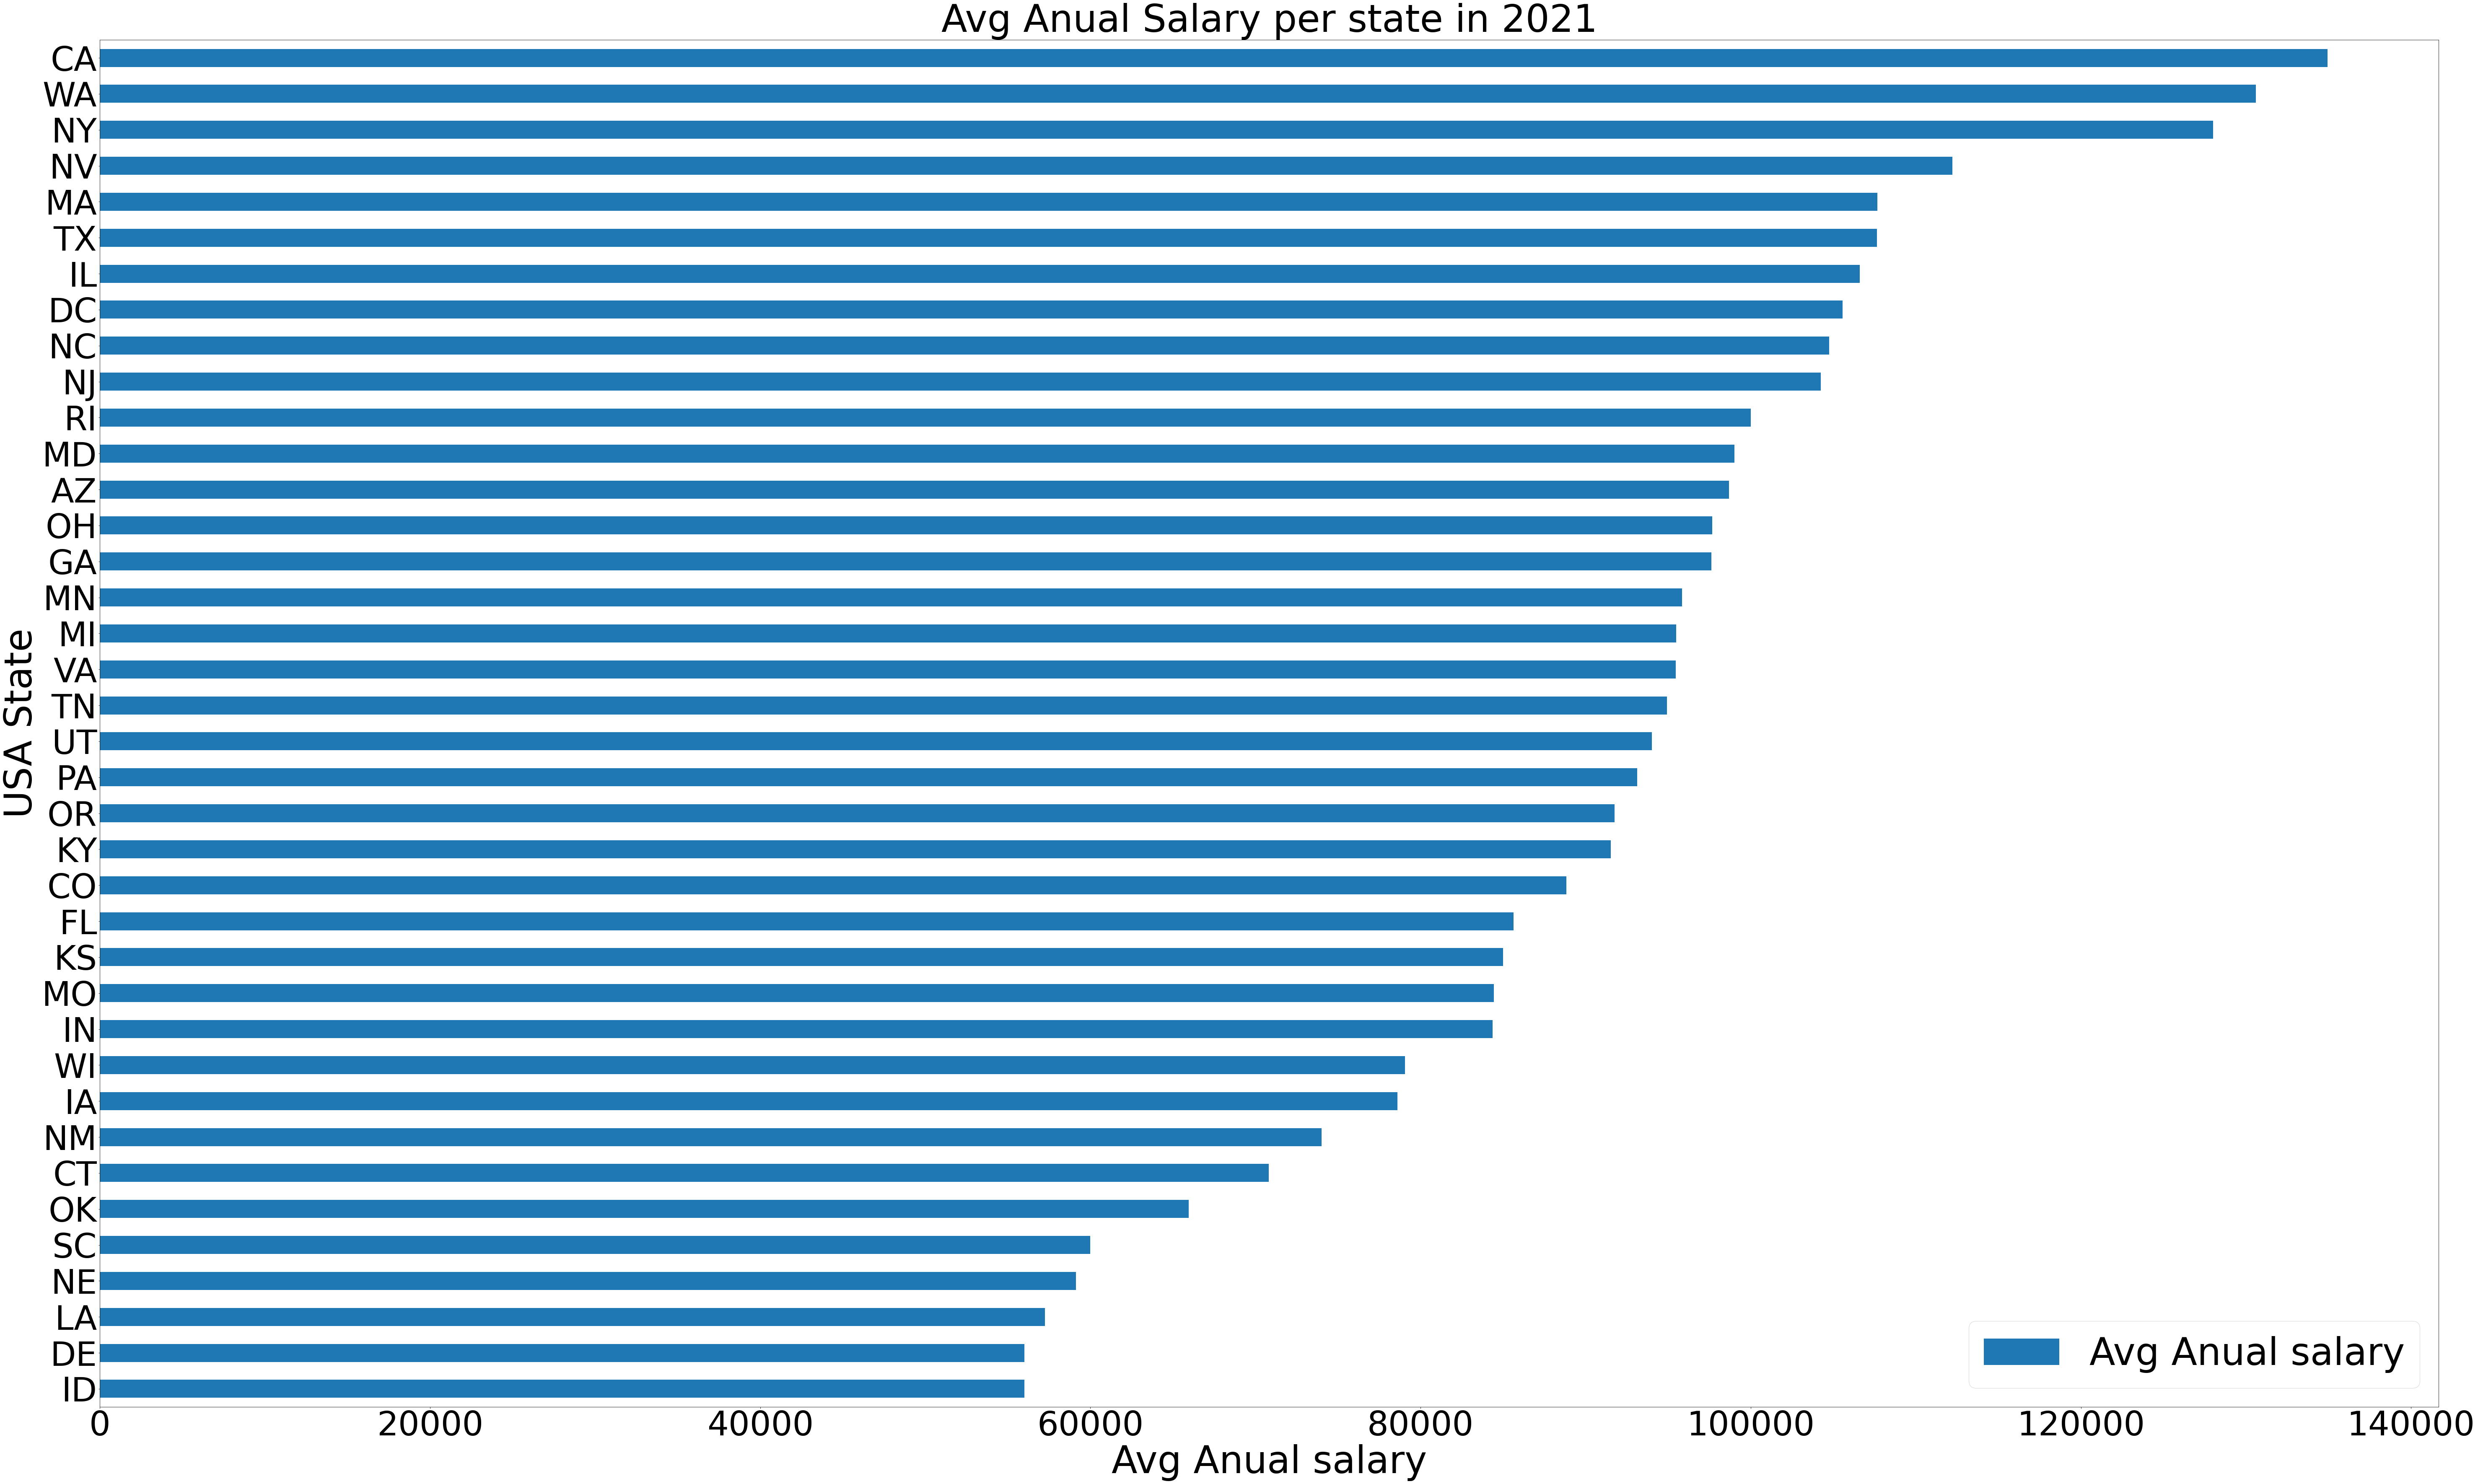

In [402]:
h1bdata_ds_salaries_df = h1bdata_df[h1bdata_df['Job State'] != ''].copy(deep=True)
glassdoor_state_sal = glassdoor_df[['Job State', 'Avg Salary(K)']][glassdoor_df['Job State'] != ''].copy(deep=True)
glassdoor_state_sal.columns = ['Job State','salary']


#
#glassdoor_state_sal[glassdoor_state_sal['Job State'] == "CA']"] = "CA"

glassdoor_state_sal['salary'] = glassdoor_state_sal['salary'].apply(lambda x: np.int64(x)*1000)
glassdoor_state_sal [ glassdoor_state_sal["Job State"] == "CA']" ] = ["CA",107000]
h1bdata_state_sal = h1bdata_df[['Job State','salary']]


state_salaries_df = pd.concat([glassdoor_state_sal,h1bdata_state_sal], axis=0)

median_per_state = state_salaries_df.groupby("Job State").mean()
median_per_state = median_per_state[1:].sort_values('salary', ascending=True)
ax = median_per_state.plot(kind='barh', figsize=(100,60))
ax.tick_params(axis='both', which='major', labelsize=80)
plt.xlabel("Avg Anual salary", fontsize=90)
plt.ylabel("USA State", fontsize=90)
plt.title("Avg Anual Salary per state in 2021", fontsize=90)
plt.legend(['Avg Anual salary'],prop={'size': 90})

In [405]:
median_per_state.sort_values('salary', ascending=False).iloc[:3]

salary
Job State               
CA         134929.354709
WA         130586.722973
NY         128004.201102

Hypotheses explanationAs we can see above, the States with the most greatest AVg Data scientist salaries are Calfiornia(CA), Washiton and NY.
 CA State has 53 of 500 most richest companies of the world  and additionally has the 3 of 4 tech giant of the world: Google, Apple and Microsoft, the so spoken silicon-valley is localized on california. New york has a similar explanation, it has  53 of the 500  top richest companies of the world. Washinton is the USA state, thus we have data scientist that work for the goverment and ha 7 of top  100  most richest companies of the world, one of them is the Tech giant Amazon S.A.  In the follwing analysis we may validate that hypotheses but due the complexity a more deep investigation would be necessary to get a properly explanation, but we can get a good ideia with what will be done. The next question can may show if great comapanies tend to pays more, a companie size here is measured by it's revenue.
 
 1Billion+: Large \n
 25M-999M+: Medium \n
 2M-25M: Small \n
 2M less: Micro \n

In [406]:
print("Comapny size measurement by Revenue\n")
print('1Billion+: Large \n25M-999M+: Medium \2M-25M: Small \n2M less: Micro \n')

Comapny size measurement by Revenue

1Billion+: Large 
25M-999M+: Medium M-25M: Small 
2M less: Micro 



# In 2021- 2021 period  Which country pays more in average ?

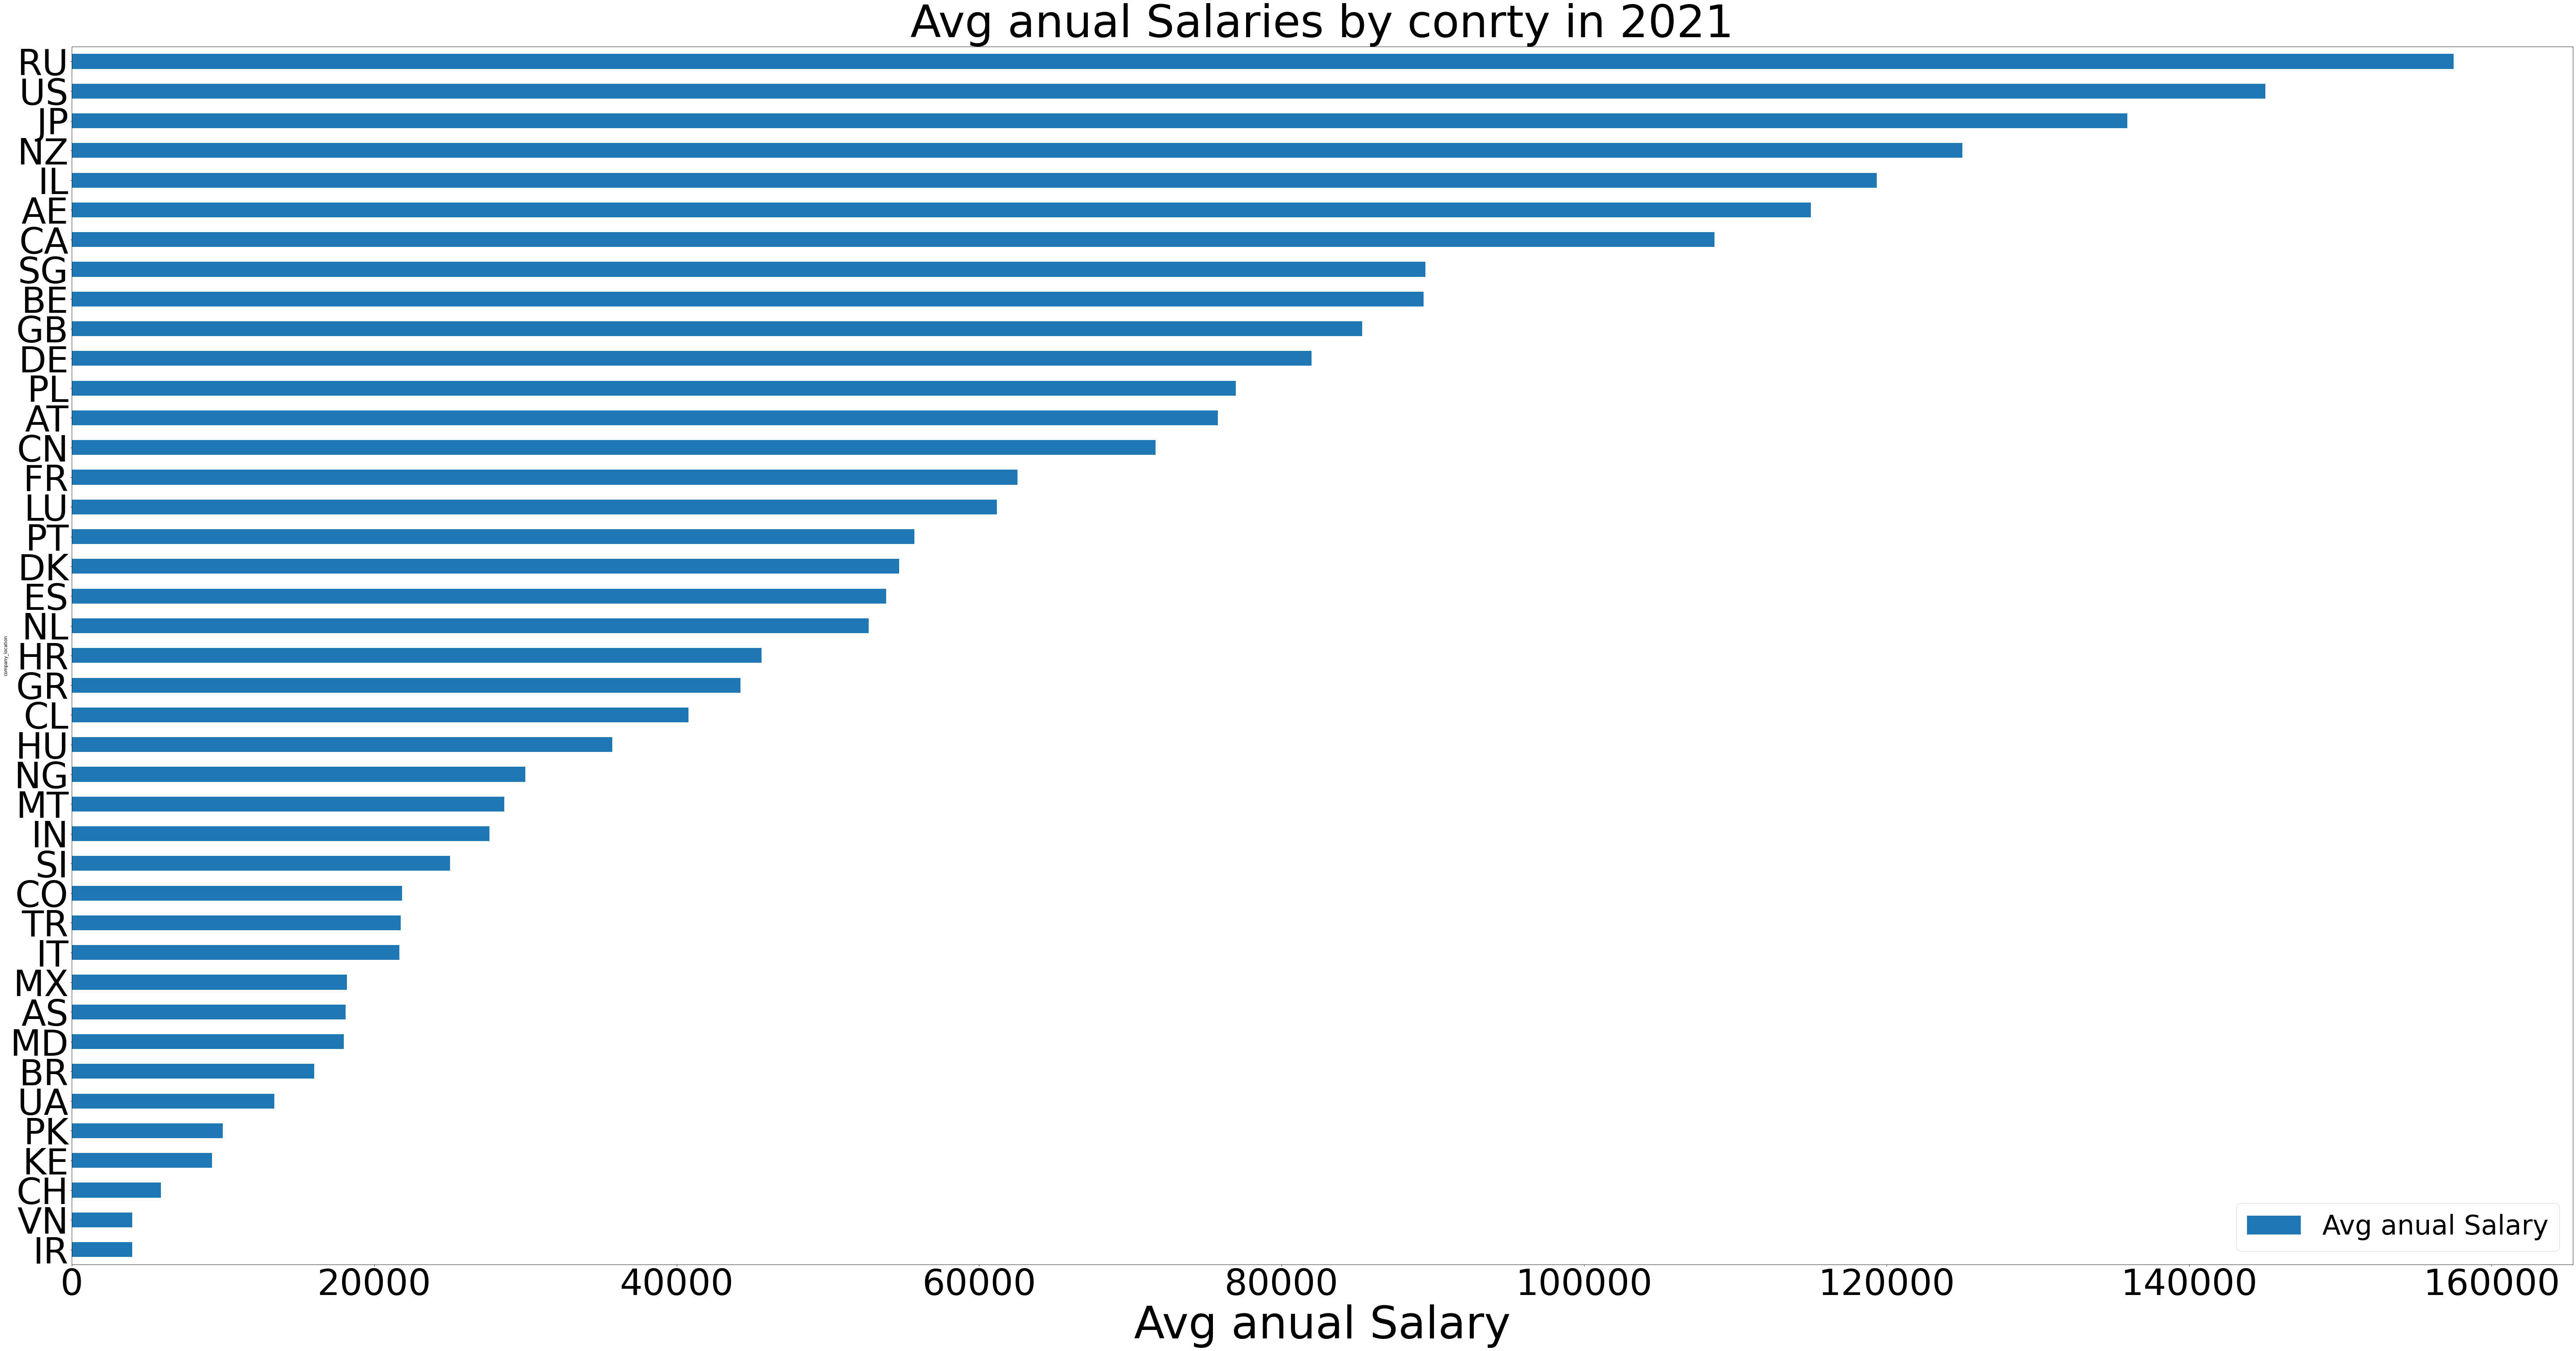

In [407]:
mean_salary_per_contry = salary_ai_df[['salary_in_usd', 'company_location']].groupby('company_location').mean().sort_values('salary_in_usd', ascending=True)
ax = mean_salary_per_contry.plot(kind='barh', figsize=(100,50))
ax.tick_params(axis='both', which='major', labelsize=80)
plt.title("Avg anual Salaries by conrty in 2021",fontsize=100)
plt.xlabel("Avg anual Salary",fontsize=100)
plt.legend(["Avg anual Salary"],prop={'size': 60})

In [408]:
pd.DataFrame(salary_ai_df['company_location'].value_counts())

company_location
US               108
DE                19
IN                17
GB                16
FR                11
CA                11
ES                 7
JP                 4
AT                 3
NL                 3
PL                 3
DK                 3
TR                 3
BR                 2
GR                 2
PK                 2
LU                 2
CN                 2
NG                 2
RU                 2
PT                 2
MX                 2
UA                 1
IL                 1
HR                 1
AS                 1
VN                 1
MD                 1
IT                 1
CH                 1
AE                 1
SI                 1
BE                 1
CL                 1
IR                 1
NZ                 1
CO                 1
KE                 1
HU                 1
SG                 1
MT                 1

Unfortunelly it's biased, it more properly relfacted by USA. This kind of analysis needs more data.

In [409]:
mean_salary_per_contry.iloc[-3:]

salary_in_usd
company_location               
JP                135922.250000
US                145059.314815
RU                157500.000000

# in 2021, what is the distribution of average salary per companies in 2021 ? 

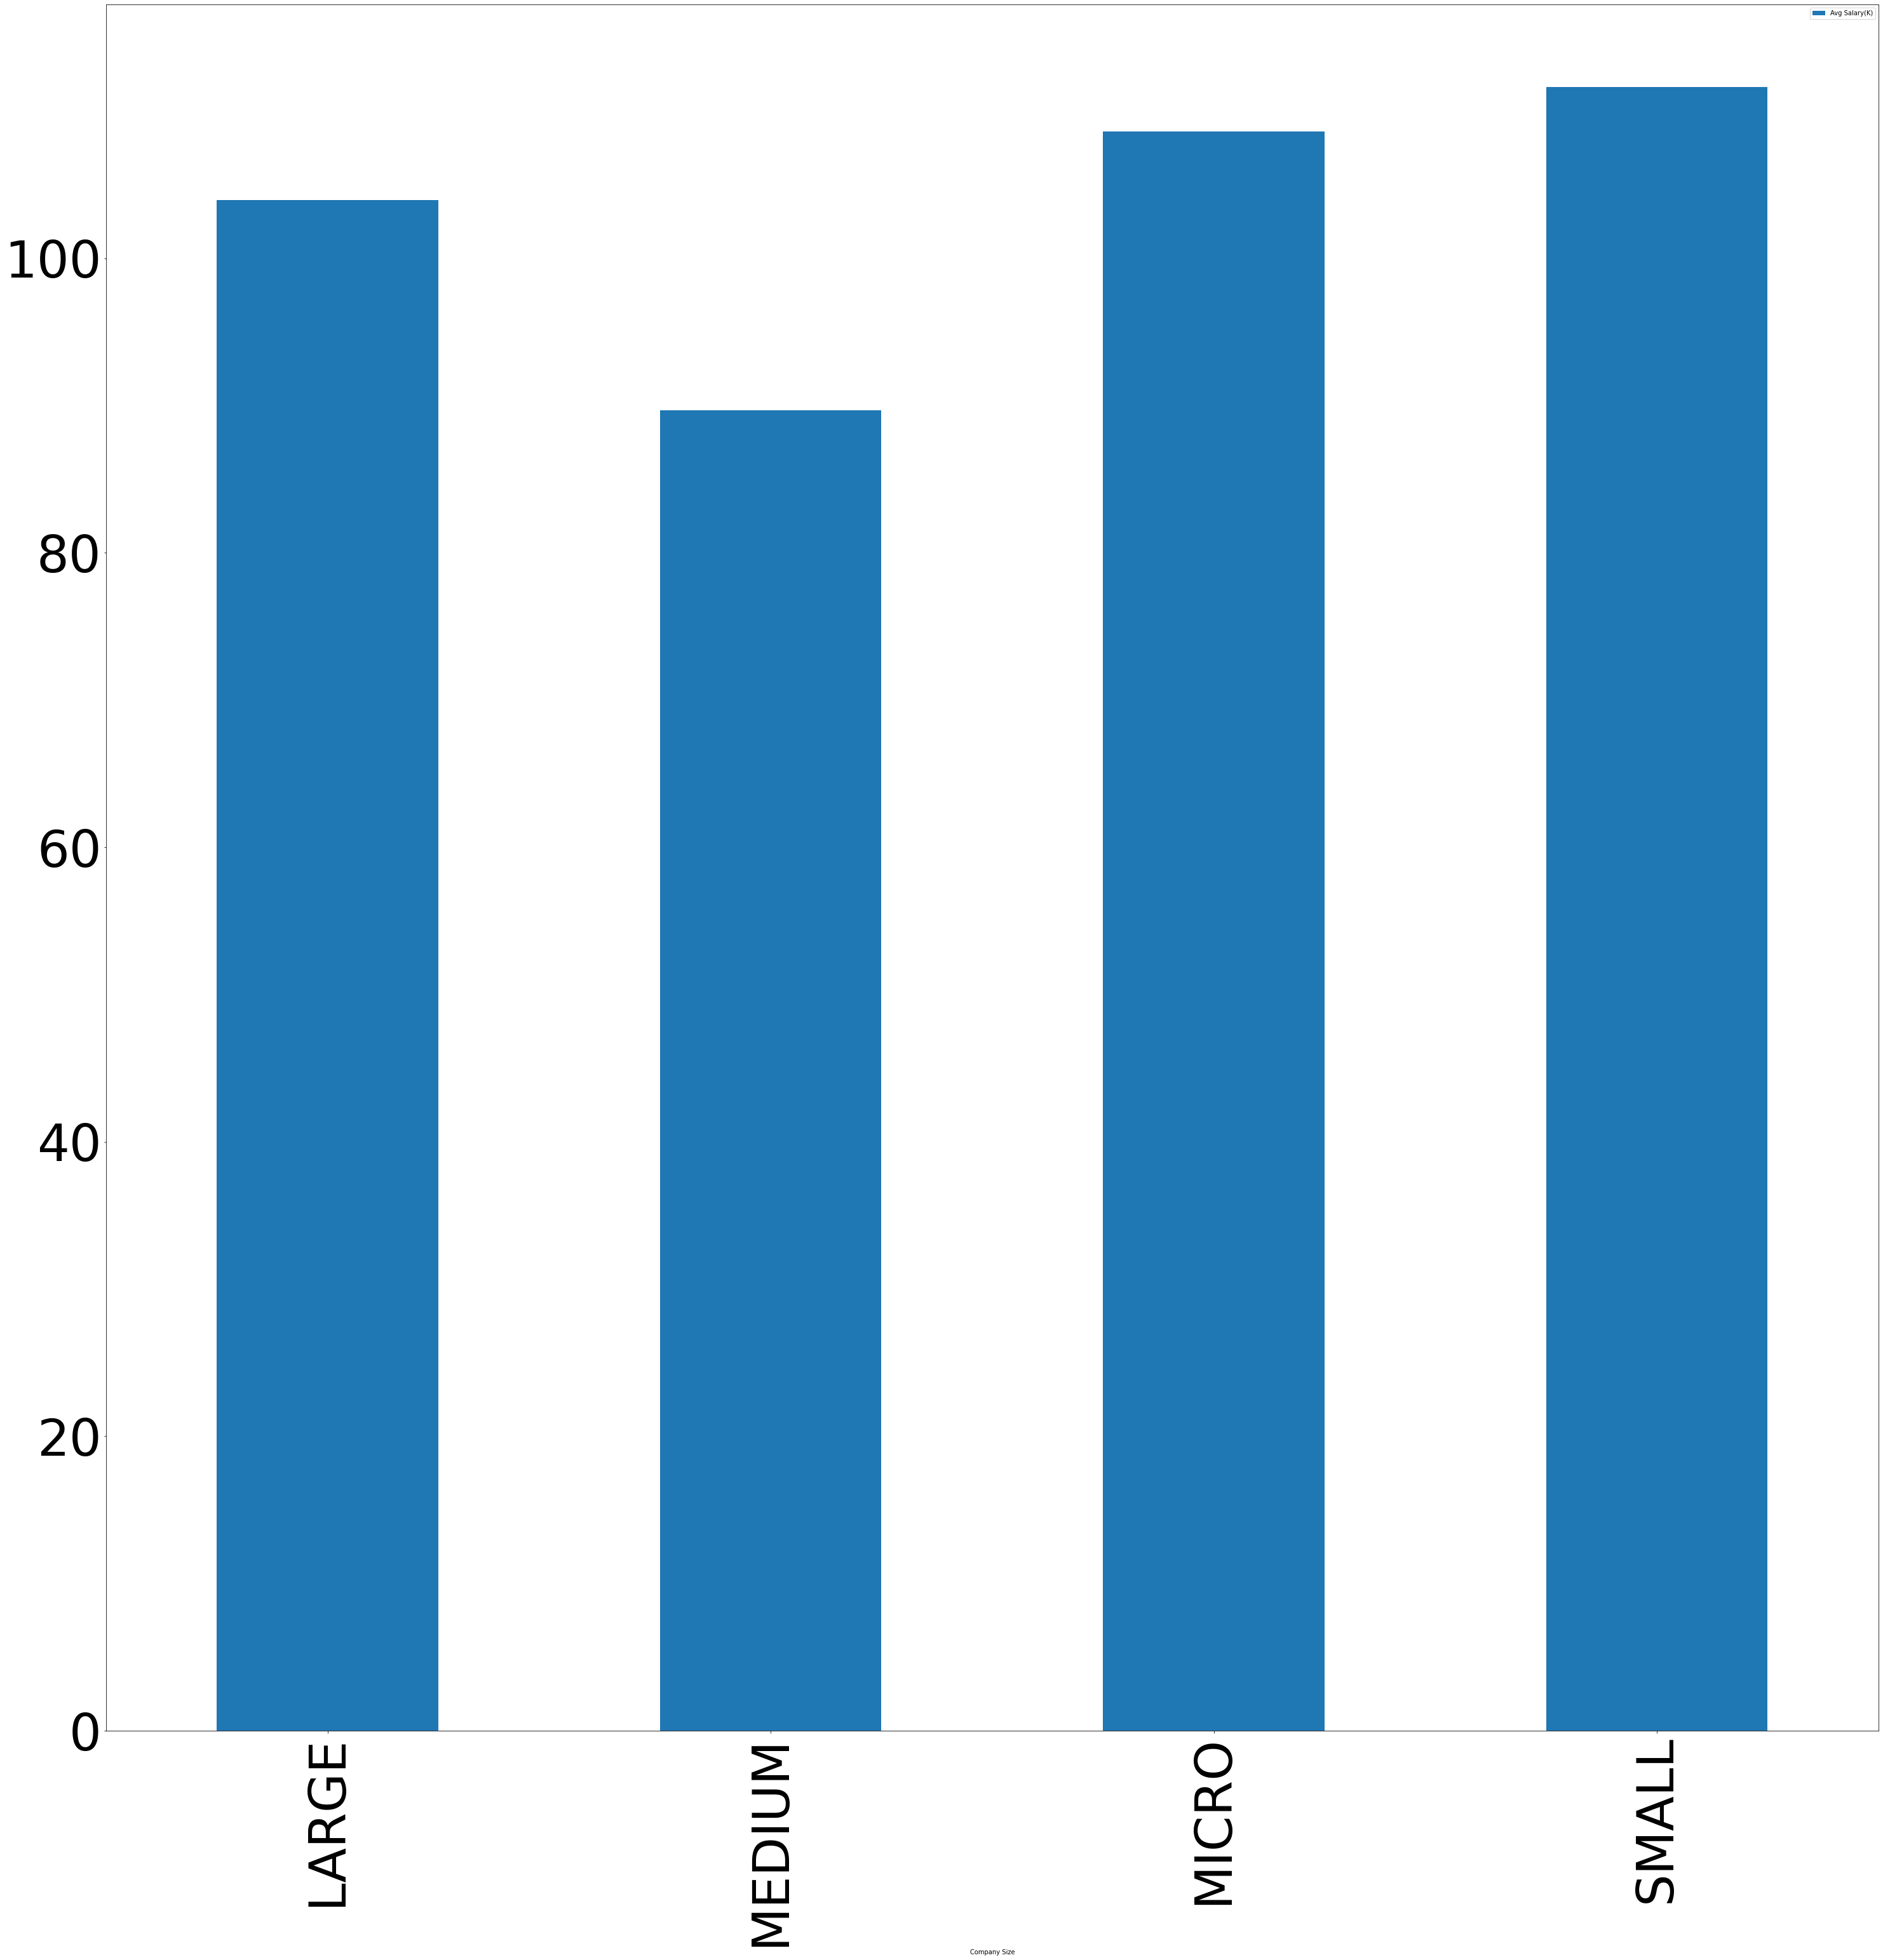

In [410]:
mean_salary_company_size = glassdoor_df[['Company Size','Avg Salary(K)']].groupby('Company Size').mean().iloc[:4]
ax=mean_salary_company_size.plot(kind='bar',figsize=(50,50))
ax.tick_params(axis='both', which='major', labelsize=80)

In [411]:
mean_salary_company_size.sort_values('Avg Salary(K)', ascending = False)

Avg Salary(K)
Company Size               
SMALL            111.646552
MICRO            108.625000
LARGE            103.933110
MEDIUM            89.677966

UAU! That is a really susprising conclusions! Accordance glassdoor dataset collected on 2021, small-micro comapanies, in mean, pays more than large companies.

Reminder: Adjust the analysis by state, you picked a column that is not dollar current from salary_ai_df. 

My inital hypotheses was broken!

# Regarding public-private companies comparison, wich ones pays more at 2021?

only glassdoor has data about private/public companies because each row intance on "type of onwership" column. 
In that columns neither all categoreis are clear especifyed as pubic or private, but most of them are, so we gonna take only intances included in that categories to  not put the analysis in risk of bias.

In [412]:
priv_pub_companies_sal_df = glassdoor_df[['Type of ownership', 'Avg Salary(K)']].copy(deep=True)
mean_sal_per_comp_ownership_df = priv_pub_companies_sal_df.groupby('Type of ownership').mean()

In [413]:
mean_sal_per_comp_ownership_df.loc[['Company - Private','Government']]

Avg Salary(K)
Type of ownership               
Company - Private     102.081707
Government             85.733333

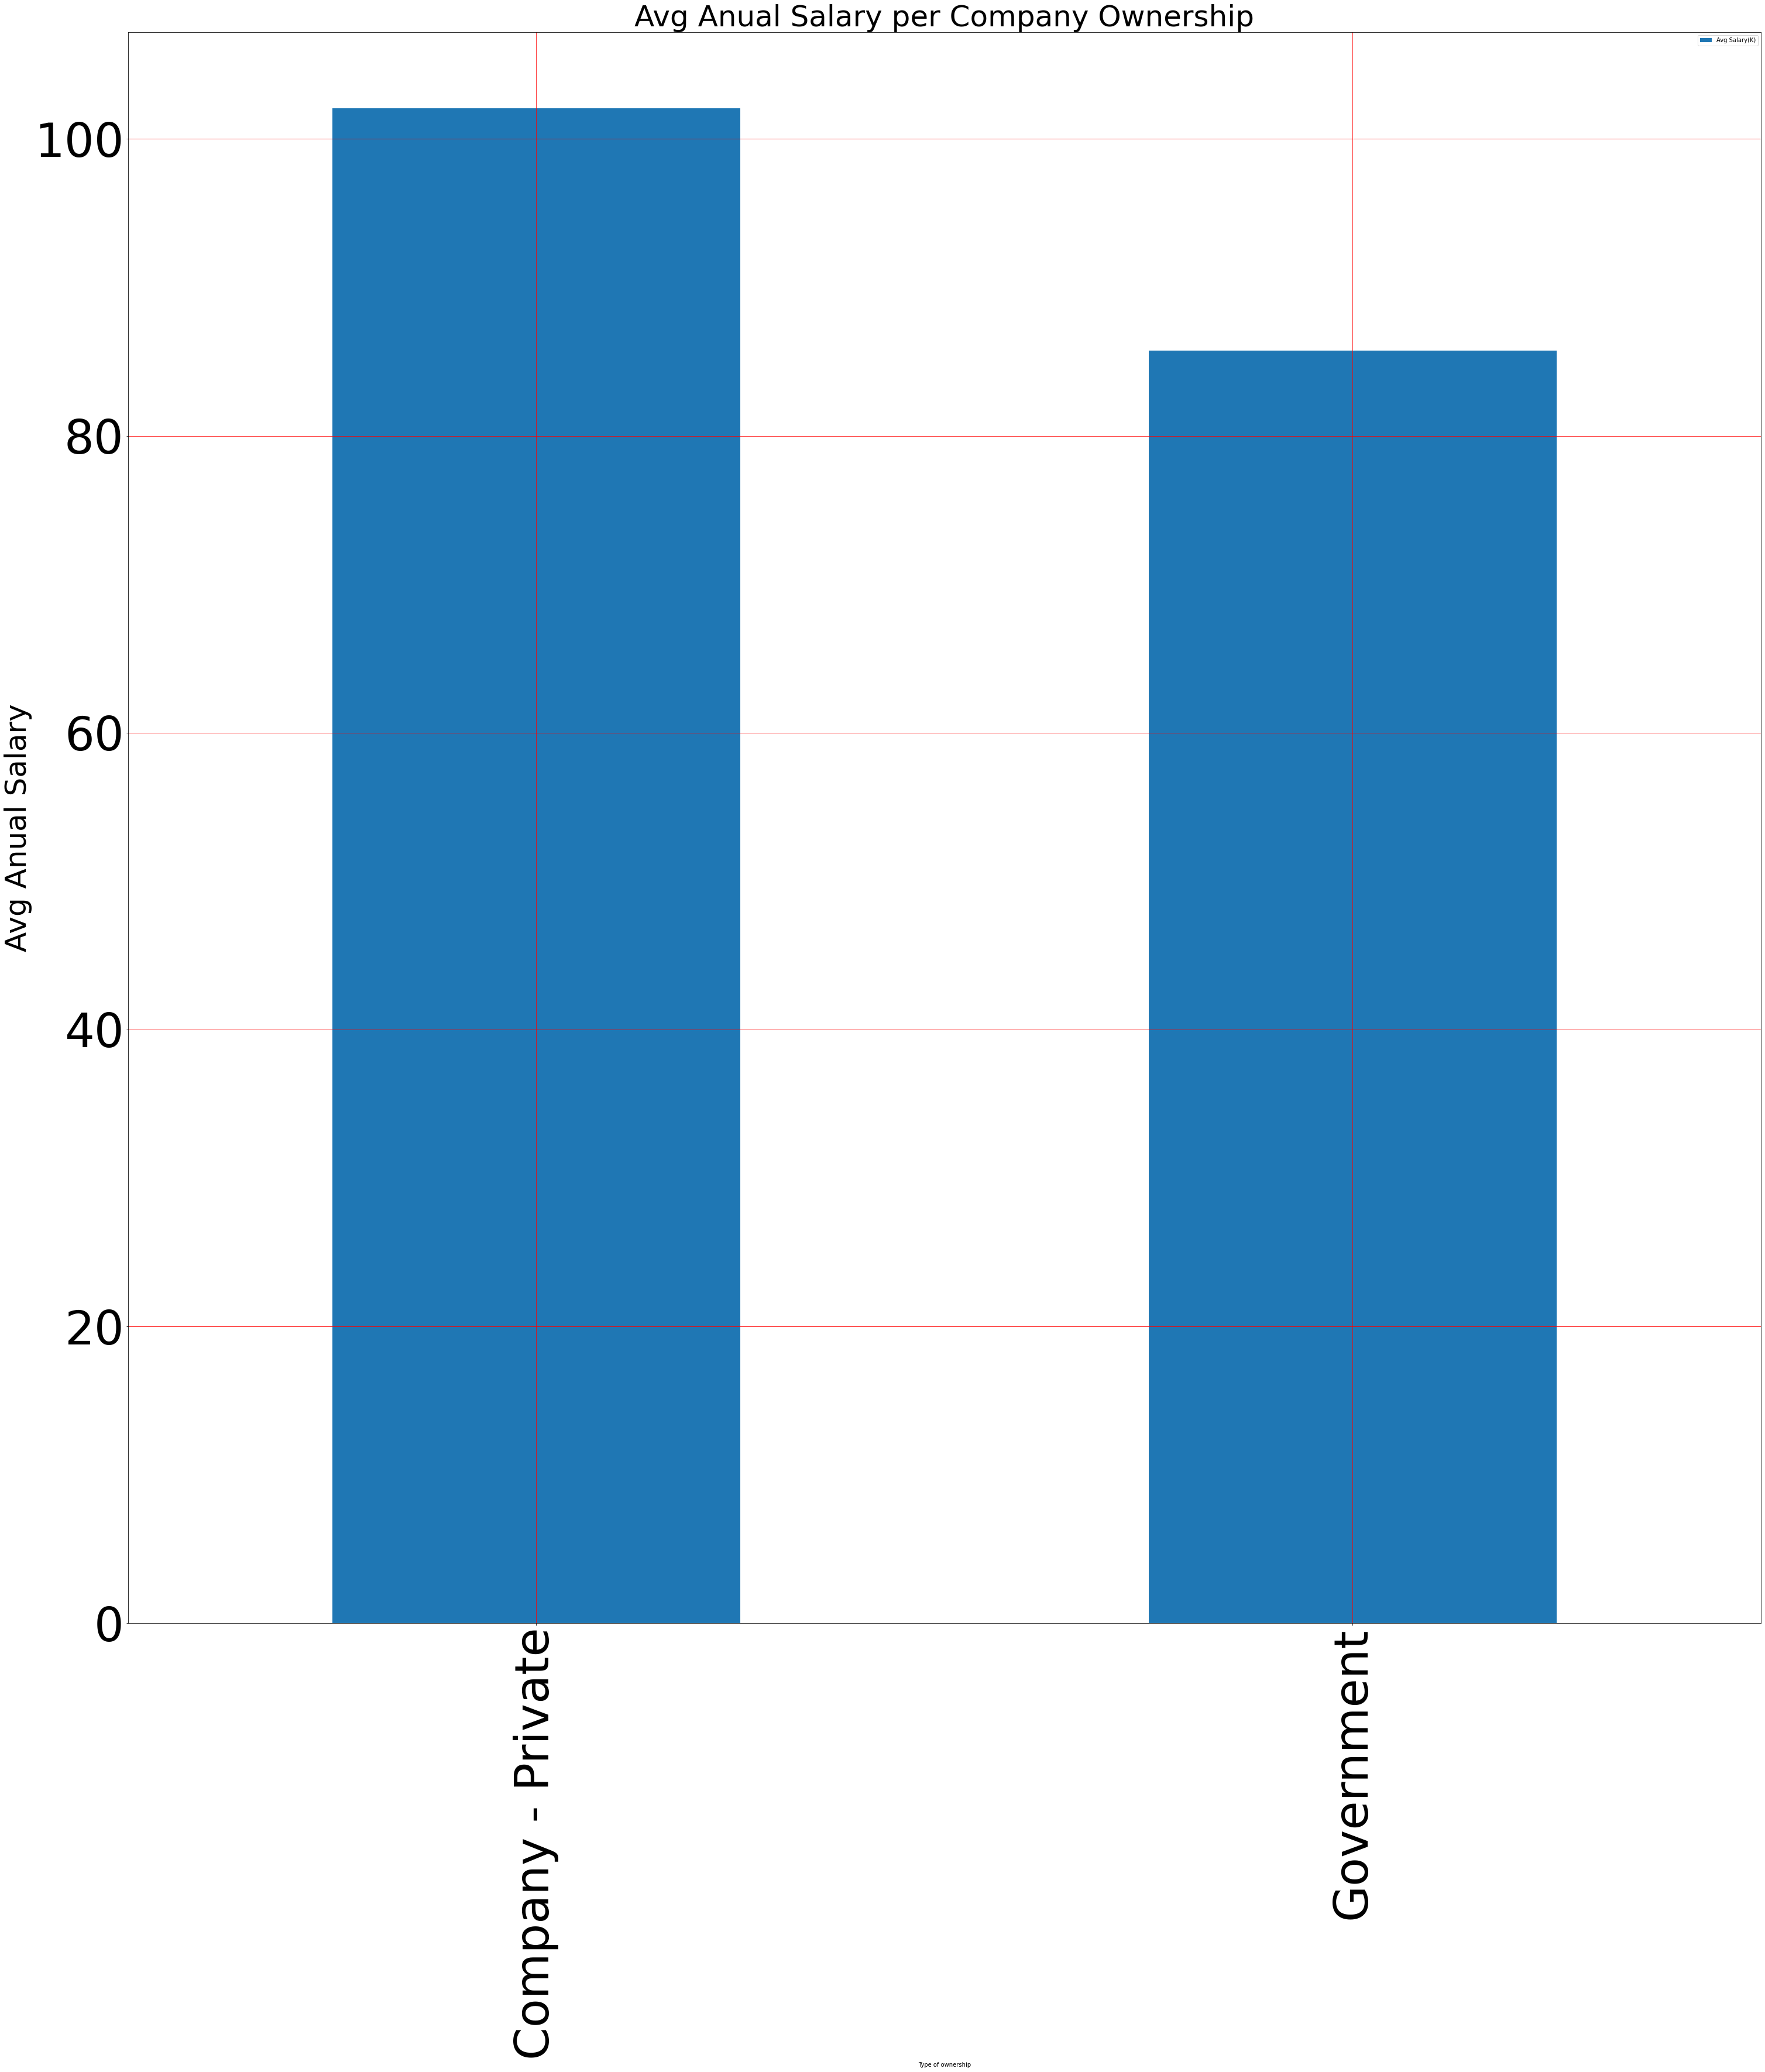

In [414]:
ax = mean_sal_per_comp_ownership_df.loc[['Company - Private','Government']].plot(kind='bar', figsize=(50,50))
plt.title("Avg Anual Salary per Company Ownership", fontsize=50)
plt.ylabel("Avg Anual Salary", fontsize = 50)
ax.tick_params(axis='both', which='major', labelsize=80)
plt.grid(True,color='red')

## Which one has the greatest employee satisfaction ? 

In [415]:
employee_satisfaction_df = glassdoor_df[['Type of ownership', 'Rating']].copy(deep=True)
avg_employee_satisfaction_df= employee_satisfaction_df.groupby('Type of ownership').mean()
avg_employee_satisfaction_df = avg_employee_satisfaction_df.loc[['Company - Private','Government']]

In [416]:
avg_employee_satisfaction_df

Rating
Type of ownership          
Company - Private  3.648293
Government         3.626667

It seems pretty clear that, there's no huge difference betwenn employee satisfaction between public or private companeies on USA, what shows that the salary and employee satisfaction is weakly correlated. Let's confirm that

In [417]:
corr_analysis_df = glassdoor_df[['Type of ownership', 'Rating','Avg Salary(K)']].copy(deep=True)
corr_analysis_df.corr()

Rating  Avg Salary(K)
Rating         1.000000       0.012475
Avg Salary(K)  0.012475       1.000000

Indeed, salary and employee rating is weakly correalted.

# Skill Requeriments analysis

In [418]:
skill_analysis_df = glassdoor_df[['Python', 'spark', 'aws', 'excel',
       'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an']].copy(deep=True)
skill_analysis_df = pd.DataFrame(skill_analysis_df.sum(), columns=['required times'])

In [419]:
skill_analysis_df.sort_values('required times', ascending=False)

required times
Python                392
excel                 388
sql                   380
aws                   176
spark                 167
tableau               148
hadoop                124
tensor                 72
sas                    66
bi                     56
scikit                 54
pytorch                39
mongo                  37
keras                  29
google_an              14
flink                  10

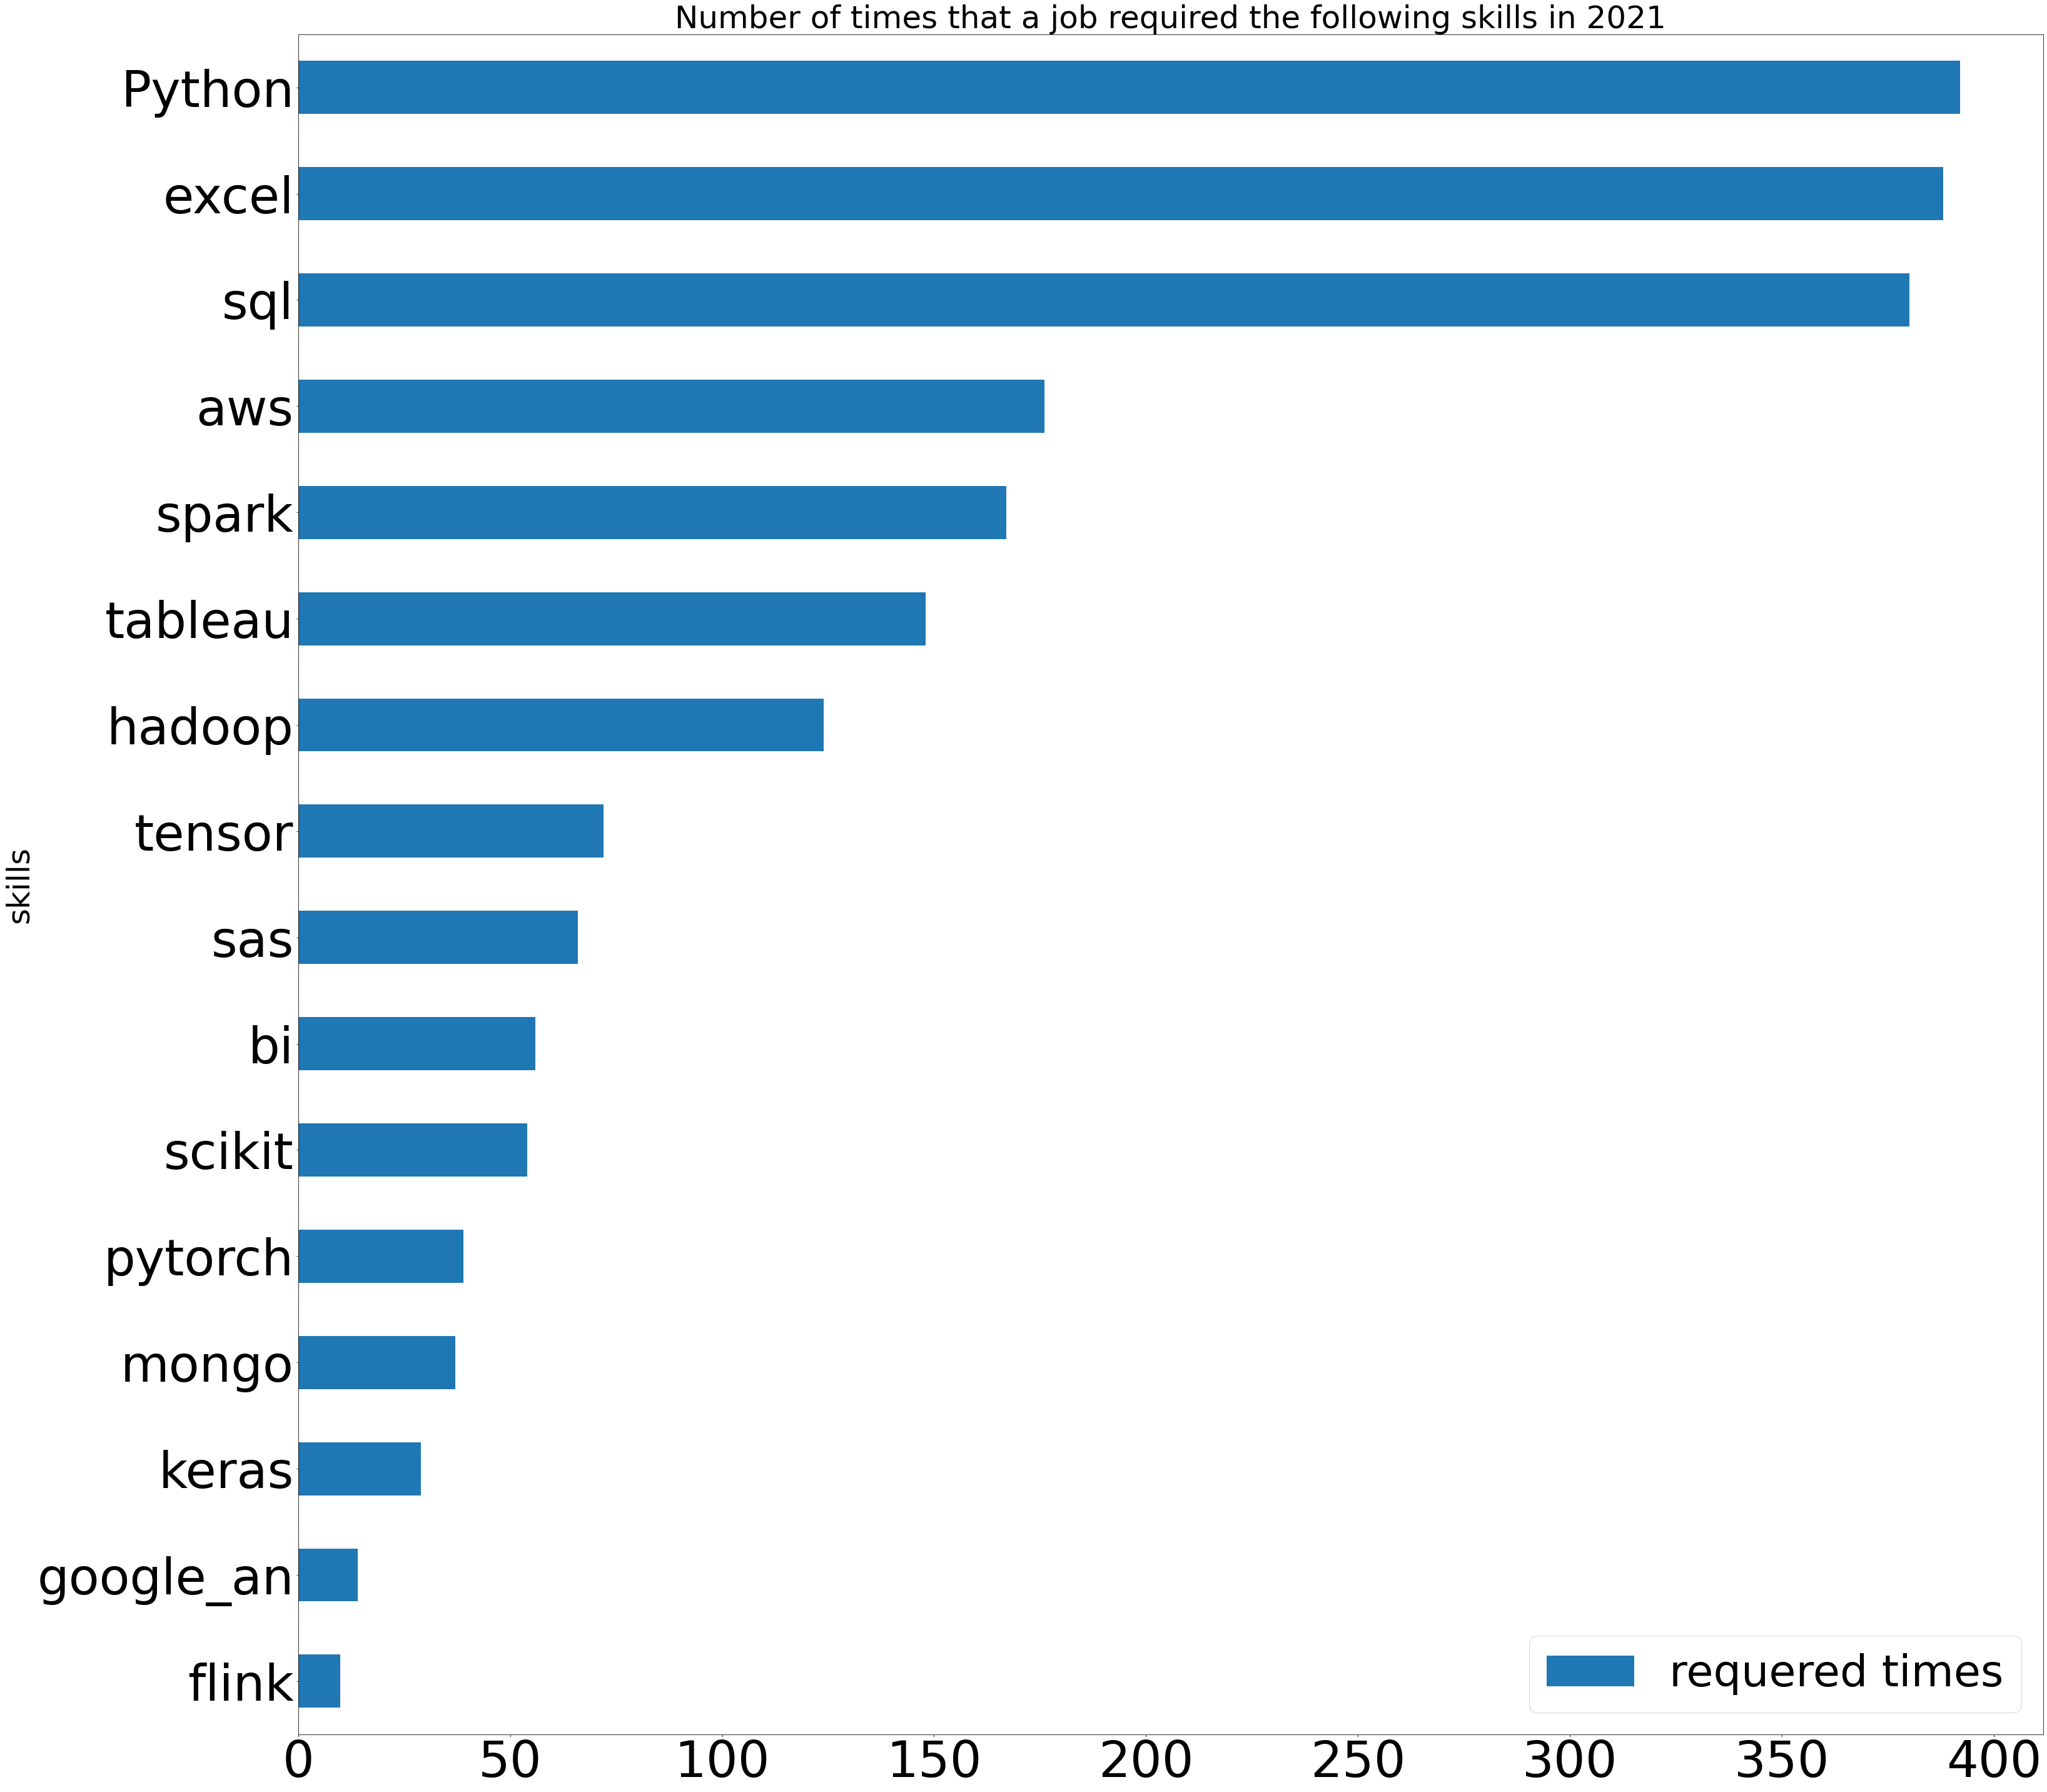

In [420]:
ax = skill_analysis_df.sort_values('required times').plot(kind='barh',figsize=(50,50))
ax.tick_params(axis='both', which='major', labelsize=80)
plt.title("Number of times that a job required the following skills in 2021", fontsize=50)
plt.ylabel("skills", fontsize = 50)
plt.legend(["requered times"],prop={'size': 70})

# The Evolution of  data scientists salaries 2014-2022


We previously have taken out of samples out of year 2021, as we are now interested in samples from 2014 to 2021, we need that samples back again, let's load h1bdata again

In [445]:
_,h1bdata_df,_ = get_data_cleaned()
h1bdata_df['date'] = pd.to_datetime( h1bdata_df['date'])
h1bdata_df['salary'] = h1bdata_df['salary'].apply(lambda x: np.int64(x.replace(',',''))*1000)
h1bdata_df['registry year'] = h1bdata_df['date'].apply(lambda x: x.year)

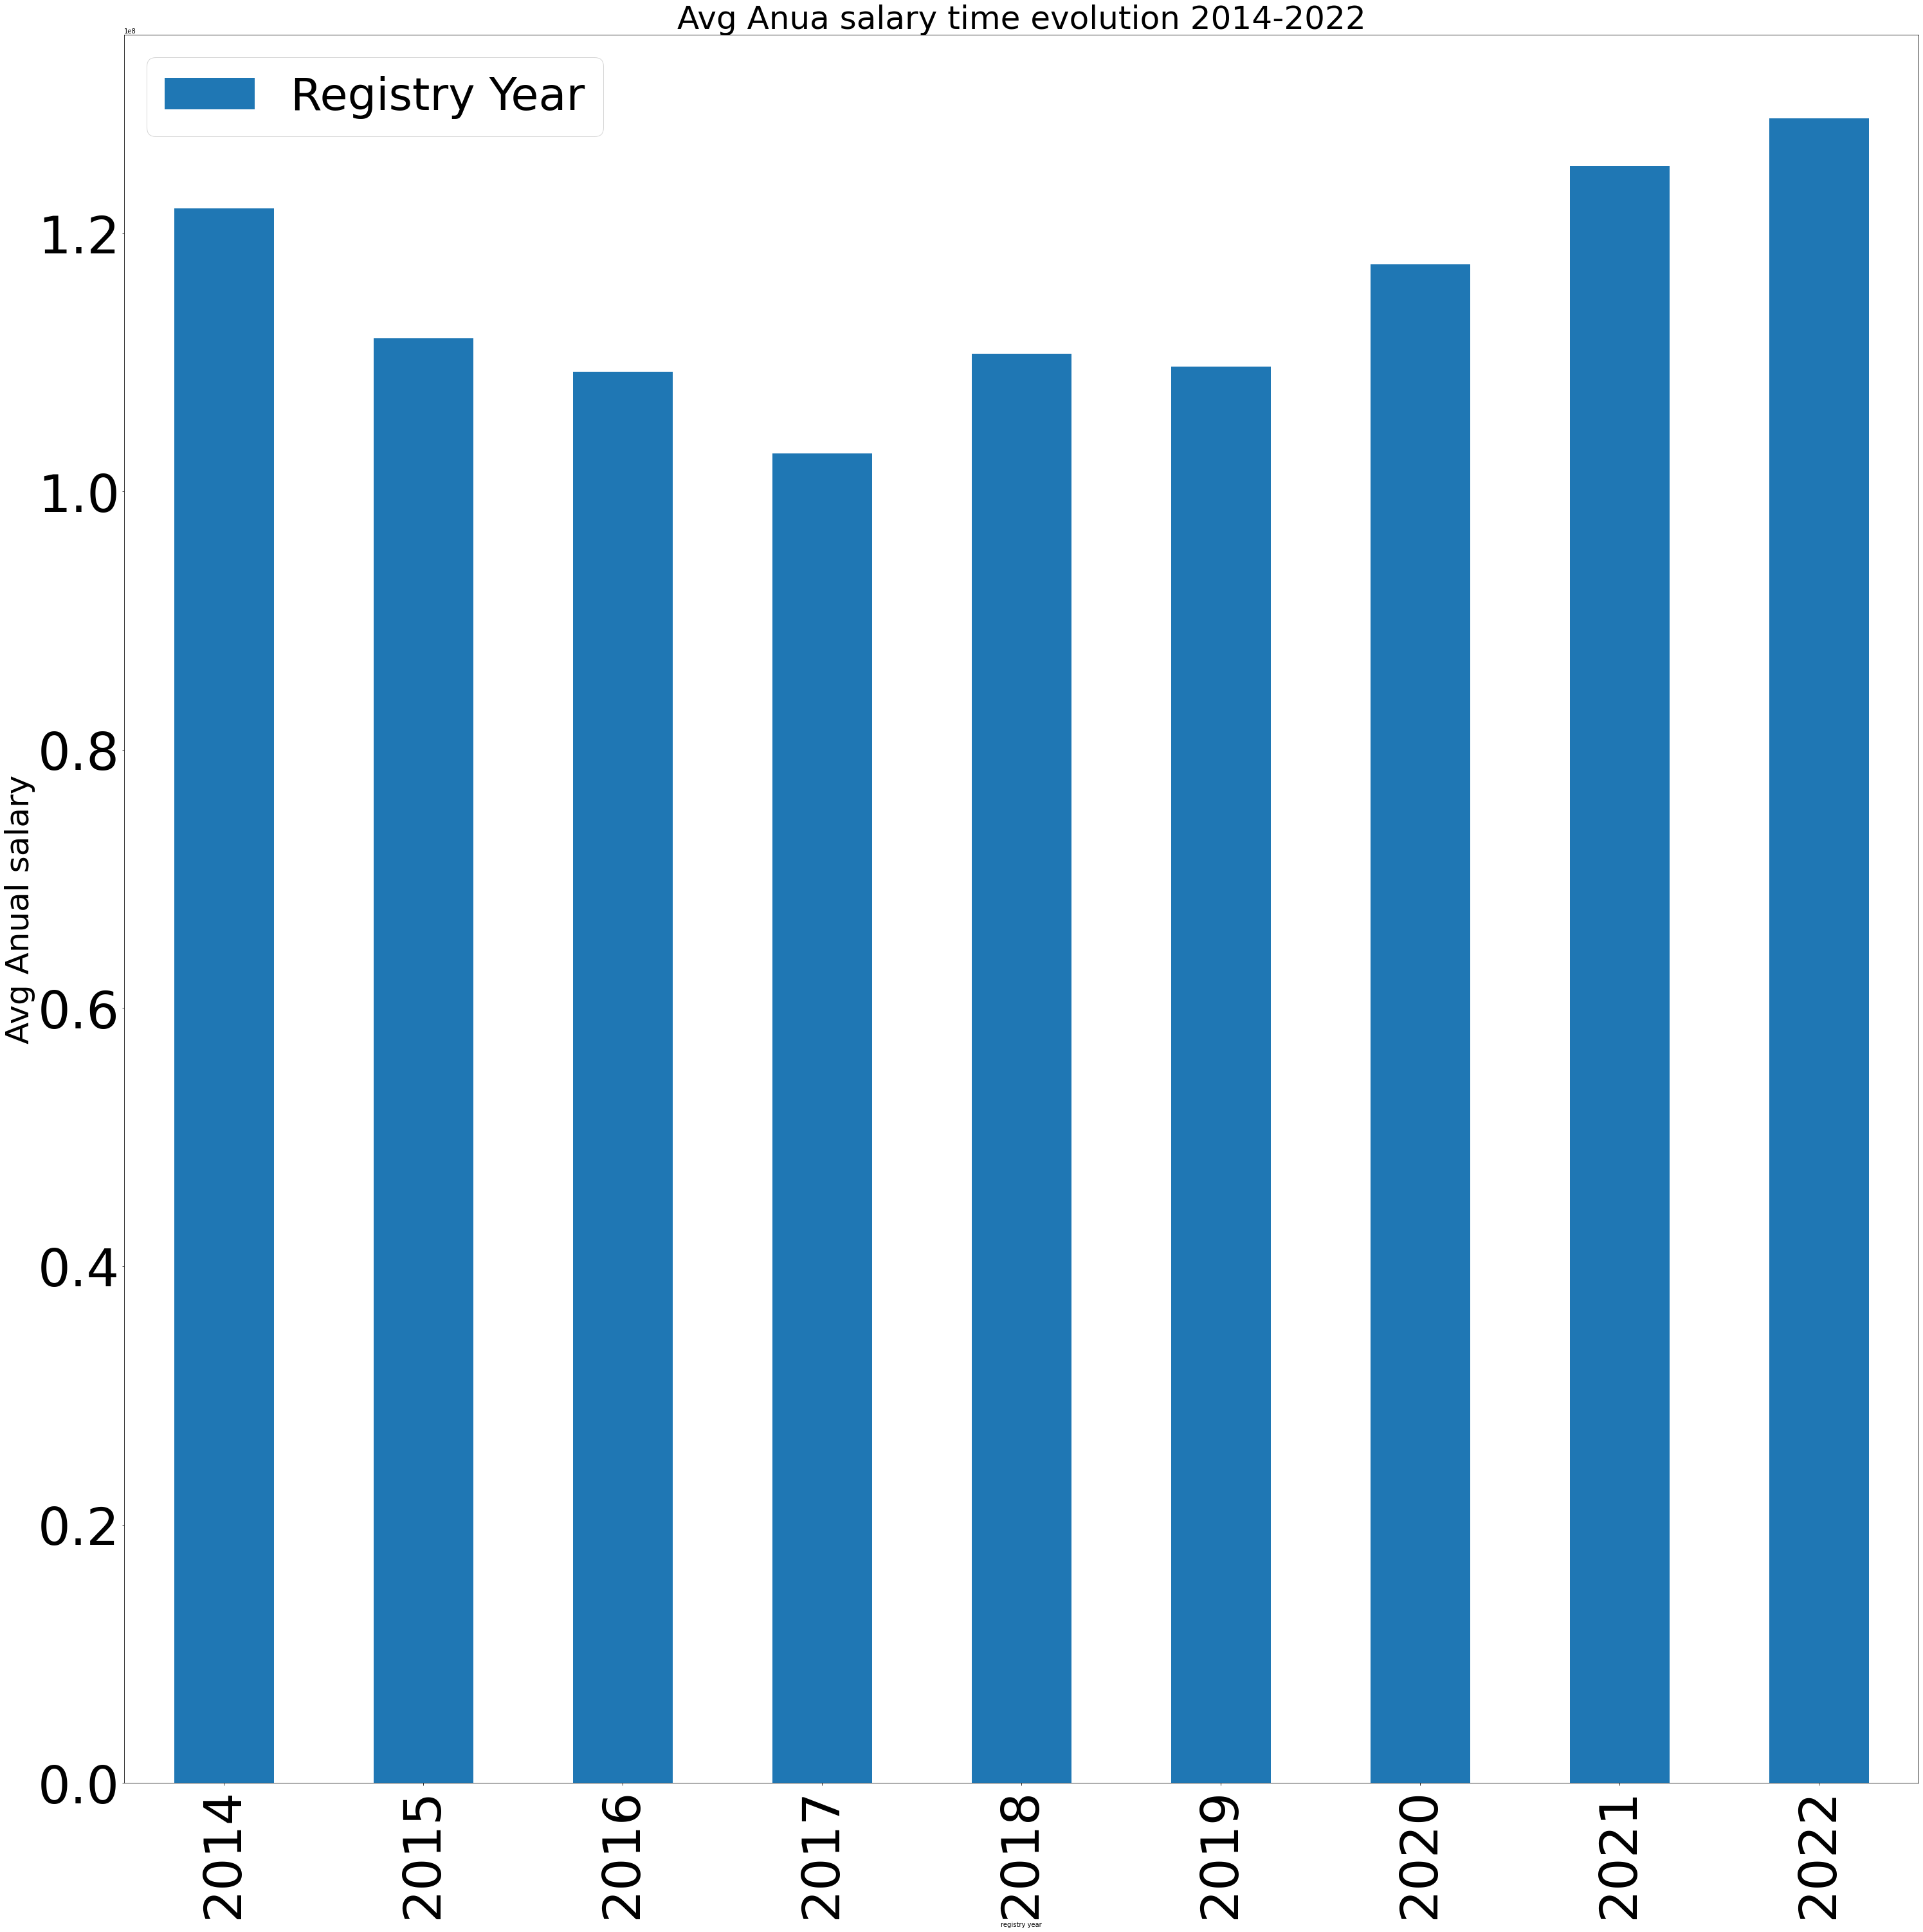

In [450]:
salary_time_evolution_df = h1bdata_df[['registry year','salary']].copy(deep=True)
ax = mean_sal_year_df = salary_time_evolution_df.groupby('registry year').mean().plot(kind='bar', figsize=(50,50))
ax.tick_params(axis='both', which='major', labelsize=80)
plt.title("Avg Anua salary time evolution 2014-2022", fontsize=50)
plt.ylabel("Avg Anual salary", fontsize = 50)
plt.legend(["Registry Year"],prop={'size': 70})